<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/LinearAlgebra/Gaussian_Elimination_Part_1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

The purpose of this documentation is to explain how analyzing this general linear equation.

$$\begin{matrix}
x_1m_{1,1}&+\,x_2m_{1,2}&+\,...&+\,x_nm_{1,N}&=\,y_1\\
x_1m_{2,1}&+\,x_2m_{2,2}&+\,...&+\,x_nm_{2,N}&=\,y_1\\
...&...&...&...&...\\
x_1m_{N,1}&+\,x_2m_{N,2}&+\,...&+\,x_nm_{N,N}&=\,y_1
\end{matrix}$$

by converting this equation in the matrix form
* $M\cdot \vec{x}=\vec{y}$

Specifically "Gauss Jordan Elimination Part 1: Introduction.ipynb" aims to introduce
1. How does Gauss Elimination works?
2. How to find the value of $\vec{x}$ using Gauss Elimination in Python ?
3. How to interpretate the Reduced Row Echelon Form of the matrix $M$ in 3 different case ?
* 3.1 The Linear Equation with an Unique Solution.
* 3.2 The Linear Equation with an Infinite Solutiosn.
* 3.3 The Linear Equation with no Solution.

Note that this documentation is the first part there will be 2 chapters release in the future
1. "Gaussian Elimination Part 2: Recommendation System.ipynb"
* This documentation is about the application of this algorithm in Recommendation System and other alternative technique such as linear regression and p value and how those technique are similar, different and related to each other.
2. "Gaussian Elimination Part 3: LU Decomposition.ipynb"
* This documentation is about the similarity and different between this algorithm and LU decomposition, and the practical application of LU Decomposition.

We will visualizing the solution of $M\cdot \vec{x}\in \mathbb{R}^3$ and discussing the intersection of hyperplane as the example of the linear equation that we will study. If you find out that the visualization is confusing, you can study the Euclidean Geometry in 3D by reading those 2 lectures.
1. Hyperplane Part 1: Plane in 2D and 3D.ipynb
* https://colab.research.google.com/drive/1CRtPo_0NUZ85aK6q-GnsE5Pa2zmRGAEE?usp=sharing
2. Hyperplane Part 2: Projection in 2D and 3D.ipynb
* https://colab.research.google.com/drive/1X2VB8FdHlG6v9zvFOvKayTdZovFYNIX8?usp=sharing



#3D Visualization Python Library

##Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm
import math
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python
from scipy.linalg import lu

##Line, Point and Arrow as Vector

In [ ]:
def Line3D(
    ax,
    Start,
    Color,
    End=np.zeros(3)):
   ax.plot(
      [Start[0],End[0]],
      [Start[1],End[1]],
   zs=[Start[2],End[2]],
      color=Color)

In [ ]:
def Point3D(ax,Point,Color):
  ax.plot((Point[0]),(Point[1]),(Point[2]),
        lw=3,
        marker='.',
        markersize=7,
        color=Color,
        markerfacecolor=Color)

In [ ]:
def Vector3D(
    ax,
    Start,
    Color,
    End=np.zeros(3)):
  Line3D(ax,Start,Color,End)
  Point3D(ax,Start,Color)

In [ ]:
def Origin(ax):
  Point3D(ax,np.zeros(3),'#000000')

In [ ]:
def ViewPlot(ax,ViewInit=(30,45),SetEqual=False):
  ax.set_xlabel('X axis')
  ax.set_ylabel('Y axis')
  ax.set_zlabel('Z axis')
  if SetEqual==True:
    ax.set_box_aspect(aspect=(1, 1, 1))
    # https://stackoverflow.com/questions/8130823/set-matplotlib-3d-plot-aspect-ratio
  ax.view_init(ViewInit[0],ViewInit[1])

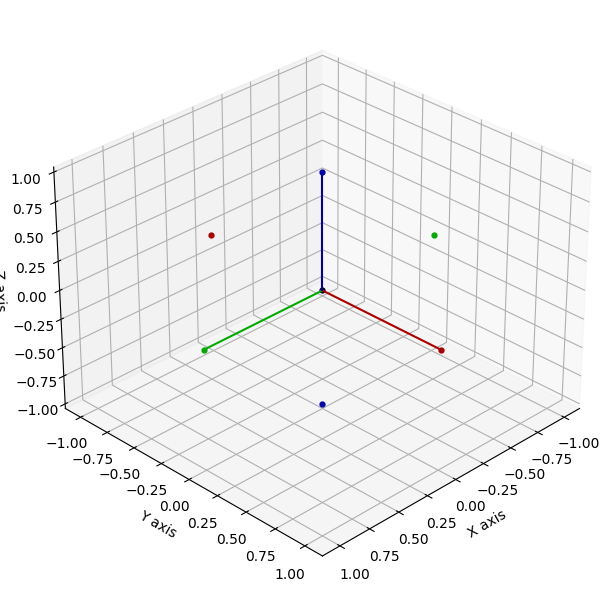

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Vector3D(ax,np.array([1,0,0]),'#00AA00')
Vector3D(ax,np.array([0,1,0]),'#AA0000')
Vector3D(ax,np.array([0,0,1]),'#0000AA')
Point3D(ax,np.array([-1,0,0]),'#00AA00')
Point3D(ax,np.array([0,-1,0]),'#AA0000')
Point3D(ax,np.array([0,0,-1]),'#0000AA')
ViewPlot(ax)
plt.show()

##Projected Vector

In [ ]:
def Magnitude(Vector):
  return np.linalg.norm(Vector)

def UnitVector(Vector):
  return Vector*(1/Magnitude(Vector))

In [ ]:
def ProjectVector(ScaleVec,Vec):
  return (np.dot(ScaleVec,Vec)/(Magnitude(ScaleVec)**2))*ScaleVec

In [ ]:
V = np.array([1,2,2])
U = np.array([-1,4,2])
sV = ProjectVector(V,U)

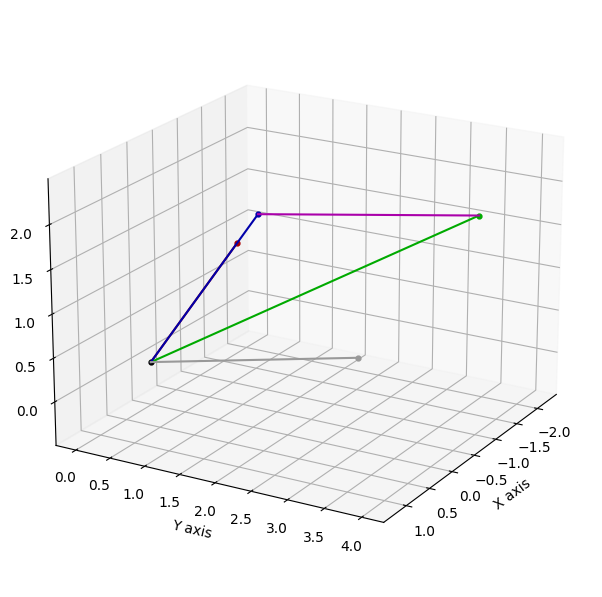

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Vector3D(ax,V,'#AA0000')
Vector3D(ax,U,'#00AA00')
Vector3D(ax,sV,'#0000AA')
Vector3D(ax,U-sV,'#999999')
Line3D(ax,sV,"#AA00AA",End=U)
ViewPlot(ax,(20,30))
plt.show()

##Plane

In [ ]:
# https://www.geeksforgeeks.org/solve-linear-equation-and-return-3d-graph-in-python/
def Plane3D_Xa(a,b,c,d,size):
  x_axis = np.linspace(-1*size, size, 10)
  Y, Z = np.meshgrid(x_axis, x_axis)
  One=np.ones(Y.shape)
  '''
  D = a * X + b * Y + c * Z
  - a * X = b * Y + c * Z - D
  a * X = - b * Y - c * Z + D
  X = - (b/a) * Y - (c/a) * Z + (1/a) * D
  '''
  X = -(b/a)*Y-(c/a)*Z+(d/a)*One
  return [X,Y,Z]

def Plane3D_Yb(a,b,c,d,size):
  x_axis = np.linspace(-1*size, size, 10)
  X, Z = np.meshgrid(x_axis, x_axis)
  One=np.ones(X.shape)
  '''
  D = a * X + b * Y + c * Z
  - b * Y = a * X + c * Z - D
  b * Y = - a * X - c * Z + D
  Y = - (a/b) * X - (c/b) * Z + (1/b) * D
  '''
  Y = -(a/b)*X-(c/b)*Z+(d/b)*One
  return [X,Y,Z]

def Plane3D_Zc(a,b,c,d,size):
  x_axis = np.linspace(-1*size, size, 10)
  X, Y = np.meshgrid(x_axis, x_axis)
  One=np.ones(X.shape)
  '''
  D = a * X + b * Y + c * Z
  - c * Z = a * X + b * Y - D
  c * Z = - a * X - b * Y + D
  Z = - (a/c) * X - (b/c) * Y + (1/c) * D
  '''
  Z = -(a/c)*X-(b/c)*Y+(d/c)*One
  return [X,Y,Z]

In [ ]:
def Plane3D(ax,Normal,Color,Alpha=0.7,D=0,size=1):
  # Compute Plane Equation and avoiding dividing by 0
  Max=0
  Loop=0
  IMax=0
  for i in Normal:
    if Max<abs(i):
      Max=abs(i)
      IMax=Loop
    Loop+=1
  XXX=[]
  if IMax==0:
    XXX=Plane3D_Xa(Normal[0],Normal[1],Normal[2],D,size)
  if IMax==1:
    XXX=Plane3D_Yb(Normal[0],Normal[1],Normal[2],D,size)
  if IMax==2:
    XXX=Plane3D_Zc(Normal[0],Normal[1],Normal[2],D,size)
  ax.plot_surface(
      XXX[0],XXX[1],XXX[2],
      alpha=Alpha,
      color=Color,
      rstride=100,
      cstride=100)

In [ ]:
NormalAlbum=np.array([2,2,3])

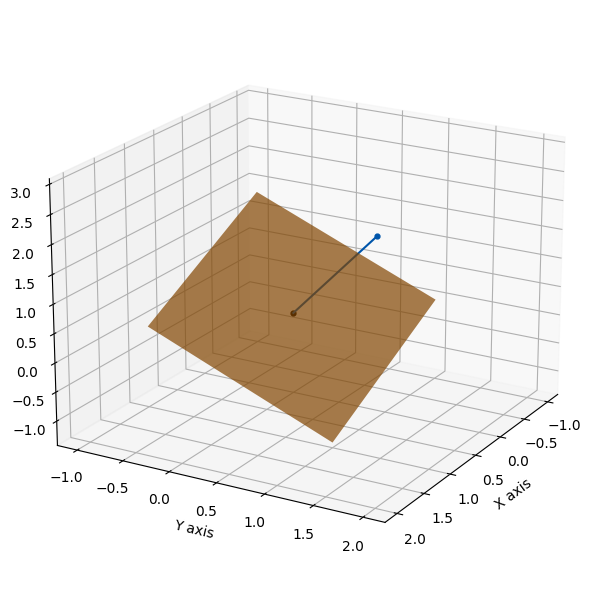

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Plane3D(ax,NormalAlbum,'#FF8800')
Vector3D(ax,NormalAlbum,'#0055AA')
ViewPlot(ax,(20,30))
plt.show()

#Gauss Elimination

##Purpose of this Algorithm

Suppose that

$$\begin{matrix}
x_1m_{1,1}&+\,x_2m_{1,2}&+\,...&+\,x_Nm_{1,N}&=\,y_1\\
x_1m_{2,1}&+\,x_2m_{2,2}&+\,...&+\,x_Nm_{2,N}&=\,y_2\\
...&...&...&...&...\\
x_1m_{N,1}&+\,x_2m_{N,2}&+\,...&+\,x_Nm_{N,N}&=\,y_N
\end{matrix}$$

Each $x_i,\,y_i$ and $m_{i,j}$ can be any number with any field $F$. The field is set of number that close under addition, multilication and division by non-zero number. You can learn more about field in abstract algebra.

The example of field $F$ is
* Real Number $\mathbb{R}$
* Rational Number $\mathbb{Q}$
* Complex Number $\mathbb{Q}$
* Prime Modulo
* P-Adic Number
* etc.

Define the vector $\vec{x}$
* $\vec{x}\,:\{1,2,...,N\}\to F$
* $\forall i\in \{1,2,...,N\}\,:\vec{x}(i)=x_i$
* $\vec{x}=[\,x_1,...,x_N\,]$

Define matrix $M$
* $M\,:\{1,2,...,N\}\times \{1,2,...,N\}\to F$
* $\forall i,j\in \{1,2,...,N\}\,:M(i,j)=m_{i,j}$
* $\forall i\in \{1,2,...,N\}\,:\vec{r}_i=(m_{i,1},m_{i,2},...,m_{i,N})=$ Row Vector of $M$ No.$i$
* $\forall i\in \{1,2,...,N\}\,:\vec{c}_i=(m_{1,i},m_{2,i},...,m_{N,i})=$ Column Vector of $M$ No.$i$

* $M=\begin{bmatrix}
m_{1,1}&m_{1,2}&...&m_{1,N}\\
m_{2,1}&m_{2,2}&...&m_{2,N}\\
...&...&...&...\\
m_{N,1}&m_{N,2}&...&m_{N,N}
\end{bmatrix}$

Define the vector $\vec{y}$
* $\vec{y}\,:\{1,2,...,N\}\to F$
* $\forall i\in \{1,2,...,N\}\,:\vec{y}(i)=y_i=\vec{x}\cdot\vec{r}_i$
* $\vec{y}=[\,y_1,...,y_N\,]$

Implies that
* $M\cdot\vec{x}=\vec{y}$

We want to find
* $\vec{x}=\,?$



##Row and Column Space

Given that

* $M=\begin{bmatrix}
m_{1,1}&m_{1,2}&...&m_{1,N}\\
m_{2,1}&m_{2,2}&...&m_{2,N}\\
...&...&...&...\\
m_{N,1}&m_{N,2}&...&m_{N,N}
\end{bmatrix}$

The Row Vector of $M$ is defined as
* $\{$ Row $\vec{v}$ of $M\,\}=\{\vec{r}_1,...,\vec{r}_N\}$
* $\vec{r}_i=[\,m_{i,1},...,m_{i,N}\,]$
* Row Space $=\text{span}(\{$ Row $\vec{v}$ of $M\,\})$

The Column Vector of $M$ is defined as
* $\{$ Column $\vec{v}$ of $M\,\}=\{\vec{c}_1,...,\vec{c}_N\}$
* $\vec{c}_i=[\,m_{1,i},...,m_{N,i}\,]$
* Column Space $=\text{span}(\{$ Column $\vec{v}$ of $M\,\})$


##Input and Output of Gauss Elimination

Given that
* $M\in V^{N\times N}$
* $\vec{y}\in V^{N}$
* $M\cdot\vec{x}=\vec{y}$

We can defined $(M,\vec{y})$ as the Augmented Matrix and perform Gauss Elimination, which will convert both $M$ and $\vec{y}$ such that
* Gauss Elimination = $\text{GE}(M,\vec{y})\to \{\text{rref}(M),\vec{x}\}$
* $\text{GE}\,:V^{N\times N}\times V^N\to \text{rref}(V^{N\times N})\times V^N$
* $\text{rref}(M)=$ Matrix $M$ in Reduced Row Echelon Form.
* $\vec{x}=$ Set of all Possible Solution of $M\cdot\vec{x}=\vec{y}$ , sometimes the equation is impossible to solve.

There are 3 possible cases of the solution of $M\cdot\vec{x}=\vec{y}$ when $\vec{y}\neq \vec{0}$
1. There exists only one solution of $\vec{x}$
2. There are infinite solutions of $\vec{x}$
3. There is no solution of $\vec{x}$

There are 2 possible case of the solution of $M\cdot\vec{x}=\vec{0}$
1. There exists only one solution of $\vec{x}$ which is $\vec{0}$
2. There are infinite solutions of $\vec{x}$ besides $\vec{0}$

The solution of $M\cdot\vec{x}=\vec{0}$ is called Null Space which is also the subspace.

**Reference**
* What is an Augmented Matrix? (by Wrath of Math)
* https://youtu.be/gJOgYIo8t20?si=6DIH45Qe3EpHrQww

##How does Gauss-Jordan-Elimination works?
* `N = M.shape[0]`
* $n=$ dimension of input square matrix.

The Gauss Elimination takes 2 inputs
1. $M=$ `Matrix`
2. $\vec{y}=$ `VecY`

It will transform both Matrix $M$ and vector $\vec{y}$ within the 3 main processes.
1. Elimination
 * Time: $O(n^3)$
 * Space: $O(n)$
 1. Start the loop from `col = 0 -> col = N-1`
 2. Swap the `col`th rows with next maximum row with `PartialPivot(M,y,di)` using $O(n)$ time and space, to avoid dividing number by a very small number or 0
 3. Start the nested loop `row = col + 1 -> row = N-1`
 4. Update `M[row]+=s*M[col]` and `y[row]+=s*y[col]` with `GaussJ_Addition(M,y,row,col)` with $O(n)$ time
2. Back Substitution
 * Time: $O(n^3)$
 * Space: $O(1)$
 1. Loop `col = N-1 -> col = 0`
 2. Nested loop `row = 0 -> row = col - 1`
 3. Update `M[row]+=s*M[col]` and `y[row]+=s*y[col]` with `GaussJ_Addition(M,y,row,col)` with $O(n)$ time
3. Scaling
 * Time: $O(n^2)$
 * Space: $O(1)$
 * It works by loop `col = 0 -> col = N` and scaling each row of `M` and `y` such that diagonal numbers in `M` becomes `1.0` with `GaussJ_Scale(s,id,M,y)`

##Complexity of Gauss Jordan Elimination
* $n=$ dimension of square matrix
* Time = $O(n^3)$
* Space = $O(n)$

##Reference
1. Gauss Elimination With Partial Pivoting In Python | Numerical Methods
* https://youtu.be/DiZ0zSzZj1g?si=s79JI2U3K_TwlPHF
2. Gaussian Elimination to Solve Linear Equations
* https://www.geeksforgeeks.org/gaussian-elimination/

In [ ]:
import numpy as np

def RowAddition_Show(Matrix,VecY,Row,Diagonal,Divide):
  # n = Dimension of Square Matrix
  # Time: O(n)
  # Space: O(1)
  Scale=Matrix[Row][Diagonal]/Divide
  print('M[R][D]',Matrix[Row][Diagonal])
  print('M[D][D]',Divide)
  if (Scale*Matrix[Diagonal][Diagonal]<0 and Matrix[Row][Diagonal]<0)or(Scale*Matrix[Diagonal][Diagonal]>0 and Matrix[Row][Diagonal]>0):
    Scale*=-1
  print('Scale',Scale)
  #print('RowAdd',Scale*Matrix[Diagonal])
  Matrix[Row]+=Scale*Matrix[Diagonal]
  VecY[Row]+=Scale*VecY[Diagonal]
  Matrix[np.abs(Matrix) < 0.0001]=0

def PartialPivot_Show(Matrix,VecY,Diagonal):
  # n = Dimension of Square Matrix
  # Time: O(n)
  # Space: O(n)
  M=Matrix.shape[0]
  MaxRow=Diagonal
  Row=Diagonal
  print()
  print('PartialPivot')
  while Row<M:
    print('Row',Matrix[Row][Diagonal])
    if abs(Matrix[MaxRow][Diagonal])<abs(Matrix[Row][Diagonal]):
      MaxRow=Row
    Row+=1
  print('Pivot from the column No.'+str(Diagonal)+' = '+str(Matrix[MaxRow][Diagonal]))
  Temp=np.array(list(Matrix[Diagonal]))
  Matrix[Diagonal]=Matrix[MaxRow]
  Matrix[MaxRow]=Temp
  Temp=VecY[Diagonal]
  VecY[Diagonal]=VecY[MaxRow]
  VecY[MaxRow]=Temp

def PrintVector(y):
  yT=y.reshape(-1,1)
  print(yT)

def GaussElimination_Show(Matrix,VecY):
  # n = Dimension of Square Matrix
  # Time: O(n^3)
  # Space: O(n)
  M=Matrix.shape[0]
  if Matrix.shape[0]!=Matrix.shape[1]:
    print('Not a Square Matrix')
    return
  if Matrix.shape[0]!=VecY.shape[0]:
    print('The dimension of Matrix and Vector are not compatible.')
    return
  # Elimination
  # Time: O(n^3)
  # Space: O(n)
  print('Initial Matrix')
  print(Matrix)
  PrintVector(VecY)
  print()
  print('Start Gauss-Jordan-Elimination')
  for Diagonal in range(M):
    PartialPivot_Show(Matrix,VecY,Diagonal)
    print()
    print('Diagonal',Diagonal)
    print(Matrix)
    PrintVector(VecY)
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Row=Diagonal+1
    while Row<M:
      RowAddition_Show(Matrix,VecY,Row,Diagonal,Divide)
      print()
      print('Row',Row)
      print(Matrix)
      PrintVector(VecY)
      Row+=1
  # Back Substitution
  # Time: O(n^3)
  # Space: O(1)
  N=M-1
  print('\nThen')
  print(Matrix)
  print()
  print('Start Back Substitution')
  for i in range(M):
    Diagonal=N-i
    Divide=Matrix[Diagonal][Diagonal]
    print()
    print('Diagonal',Diagonal)
    print(Matrix)
    if Divide==0:
      continue
    Row=Diagonal-1
    while Row>-1:
      RowAddition_Show(Matrix,VecY,Row,Diagonal,Divide)
      print()
      print('Row',Row)
      print(Matrix)
      PrintVector(VecY)
      Row-=1
  # Scaling
  # Time: O(n^2)
  # Space: O(1)
  print('\nThen')
  print(Matrix)
  print()
  print('Start Scaling')
  for Diagonal in range(M):
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0 or np.abs(Divide) < 0.0001:
      continue
    Matrix[Diagonal]*=(1/Divide)
    VecY[Diagonal]*=(1/Divide)
    print()
    print('Row',Diagonal)
    print(Matrix)
    PrintVector(VecY)
    Matrix[np.abs(Matrix) < 0.0001]=0
    # https://stackoverflow.com/questions/28430904/set-numpy-array-elements-to-zero-if-they-are-above-a-specific-threshold
    print(Matrix)


In [ ]:
def GaussElimination_Show_NoBack(Matrix,VecY):
  # n = Dimension of Square Matrix
  # Time: O(n^3)
  # Space: O(n)
  M=Matrix.shape[0]
  if Matrix.shape[0]!=Matrix.shape[1]:
    print('Not a Square Matrix')
    return
  if Matrix.shape[0]!=VecY.shape[0]:
    print('The dimension of Matrix and Vector are not compatible.')
    return
  # Elimination
  # Time: O(n^3)
  # Space: O(n)
  print('Initial Matrix')
  print(Matrix)
  PrintVector(VecY)
  print()
  print('Start Gauss-Jordan-Elimination')
  for Diagonal in range(M):
    PartialPivot_Show(Matrix,VecY,Diagonal)
    print()
    print('Diagonal',Diagonal)
    print(Matrix)
    PrintVector(VecY)
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Row=Diagonal+1
    while Row<M:
      RowAddition_Show(Matrix,VecY,Row,Diagonal,Divide)
      print()
      print('Row',Row)
      print(Matrix)
      PrintVector(VecY)
      Row+=1
  '''
  # Back Substitution
  # Time: O(n^3)
  # Space: O(1)
  N=M-1
  print('\nThen')
  print(Matrix)
  print()
  print('Start Back Substitution')
  for i in range(M):
    Diagonal=N-i
    Divide=Matrix[Diagonal][Diagonal]
    print()
    print('Diagonal',Diagonal)
    print(Matrix)
    if Divide==0:
      continue
    Row=Diagonal-1
    while Row>-1:
      RowAddition_Show(Matrix,VecY,Row,Diagonal,Divide)
      print()
      print('Row',Row)
      print(Matrix)
      PrintVector(VecY)
      Row-=1
  # Scaling
  # Time: O(n^2)
  # Space: O(1)
  print('\nThen')
  print(Matrix)
  print()
  print('Start Scaling')
  for Diagonal in range(M):
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Matrix[Diagonal]*=(1/Divide)
    VecY[Diagonal]*=(1/Divide)
    print()
    print('Row',Diagonal)
    print(Matrix)
    PrintVector(VecY)
    '''

In [ ]:
def RowAddition(Matrix,VecY,Row,Diagonal,Divide):
  # n = Dimension of Square Matrix
  # Time: O(n)
  # Space: O(1)
  Scale=Matrix[Row][Diagonal]/Divide
  if (Scale*Matrix[Diagonal][Diagonal]<0 and Matrix[Row][Diagonal]<0)or(Scale*Matrix[Diagonal][Diagonal]>0 and Matrix[Row][Diagonal]>0):
    Scale*=-1
  #print('RowAdd',Scale*Matrix[Diagonal])
  Matrix[Row]+=Scale*Matrix[Diagonal]
  VecY[Row]+=Scale*VecY[Diagonal]
  Matrix[np.abs(Matrix) < 0.0001]=0

def PartialPivot(Matrix,VecY,Diagonal):
  # n = Dimension of Square Matrix
  # Time: O(n)
  # Space: O(n)
  M=Matrix.shape[0]
  MaxRow=Diagonal
  Row=Diagonal
  while Row<M:
    if abs(Matrix[MaxRow][Diagonal])<abs(Matrix[Row][Diagonal]):
      MaxRow=Row
    Row+=1
  Temp=np.array(list(Matrix[Diagonal]))
  Matrix[Diagonal]=Matrix[MaxRow]
  Matrix[MaxRow]=Temp
  Temp=VecY[Diagonal]
  VecY[Diagonal]=VecY[MaxRow]
  VecY[MaxRow]=Temp

def GaussElimination(Matrix,VecY):
  # n = Dimension of Square Matrix
  # Time: O(n^3)
  # Space: O(n)
  M=Matrix.shape[0]
  if Matrix.shape[0]!=Matrix.shape[1]:
    print('Not a Square Matrix')
    return
  if Matrix.shape[0]!=VecY.shape[0]:
    print('The dimension of Matrix and Vector are not compatible.')
    return
  # Elimination
  # Time: O(n^3)
  # Space: O(n)
  for Diagonal in range(M):
    PartialPivot(Matrix,VecY,Diagonal)
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Row=Diagonal+1
    while Row<M:
      RowAddition(Matrix,VecY,Row,Diagonal,Divide)
      Row+=1
  # Back Substitution
  # Time: O(n^3)
  # Space: O(1)
  N=M-1
  for i in range(M):
    Diagonal=N-i
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Row=Diagonal-1
    while Row>-1:
      RowAddition(Matrix,VecY,Row,Diagonal,Divide)
      Row-=1
  # Scaling
  # Time: O(n^2)
  # Space: O(1)
  for Diagonal in range(M):
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0 or np.abs(Divide) < 0.0001:
      continue
    Matrix[Diagonal]*=(1/Divide)
    VecY[Diagonal]*=(1/Divide)
  Matrix[np.abs(Matrix) < 0.0001]=0
  # https://stackoverflow.com/questions/28430904/set-numpy-array-elements-to-zero-if-they-are-above-a-specific-threshold

In [ ]:
def GaussElimination_NoBack(Matrix,VecY):
  # n = Dimension of Square Matrix
  # Time: O(n^3)
  # Space: O(n)
  M=Matrix.shape[0]
  if Matrix.shape[0]!=Matrix.shape[1]:
    print('Not a Square Matrix')
    return
  if Matrix.shape[0]!=VecY.shape[0]:
    print('The dimension of Matrix and Vector are not compatible.')
    return
  # Elimination
  # Time: O(n^3)
  # Space: O(n)
  for Diagonal in range(M):
    PartialPivot(Matrix,VecY,Diagonal)
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Row=Diagonal+1
    while Row<M:
      RowAddition(Matrix,VecY,Row,Diagonal,Divide)
      Row+=1
  '''
  # Back Substitution
  # Time: O(n^3)
  # Space: O(1)
  N=M-1
  for i in range(M):
    Diagonal=N-i
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Row=Diagonal-1
    while Row>-1:
      RowAddition(Matrix,VecY,Row,Diagonal,Divide)
      Row-=1
  # Scaling
  # Time: O(n^2)
  # Space: O(1)
  for Diagonal in range(M):
    Divide=Matrix[Diagonal][Diagonal]
    if Divide==0:
      continue
    Matrix[Diagonal]*=(1/Divide)
    VecY[Diagonal]*=(1/Divide)'''

##Checking Function

In [ ]:
def EquivalentCheck(Num1,Num2,Precision):
  return (np.around(Num1,Precision)==np.around(Num2,Precision)).all()
# https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise
# https://stackoverflow.com/questions/25181642/how-set-numpy-floating-point-accuracy

In [ ]:
def DisplayResult(Matrix,RowEchelon,VectorX,VectorY,P1=14,P2=14):
  print('Define')
  print('# M = Matrix')
  print('# rref(M) = RowEchelon ')
  print('# x = VectorX')
  print('# y = VectorY')
  print('Formula')
  print('# M * x = y')
  print('# rref(M) * x = x')
  print()
  print('Matrix in Original Form')
  print(Matrix)
  print()
  print('Matrix in Row Echelon Form')
  print(RowEchelon)
  print()
  print('Augmented matrix in Row Echelon Form')
  print(np.concatenate((RowEchelon,VectorX.reshape(-1,1)),axis=1))
  print()
  # P1 = Precision for Test No.1
  print('M * x = y')
  print('M * x =',np.dot(Matrix,VectorX))
  print('y =',VectorY)
  print(EquivalentCheck(np.dot(Matrix,VectorX),VectorY,P1))
  print()
  # P2 = Precision for Test No.2
  print('rref(M) * x = x')
  print('x =',VectorX)
  print('rref(M) * x =',np.dot(RowEchelon,VectorX))
  print(EquivalentCheck(np.dot(RowEchelon,VectorX),VectorX,P2))

In [ ]:
def DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorY,P=14):
  print('Define')
  print('# M = Matrix')
  print('# rref(M) = RowEchelon without Back Substitution')
  print('# x = VectorX')
  print('# y = VectorX without Back Substitution')
  print('Formula')
  print('# rref(M) * x = y')
  print()
  print('Matrix in Original Form')
  print(Matrix)
  print()
  print('Matrix in Row Echelon Form')
  print(RowEchelon)
  print()
  print('Augmented matrix in Row Echelon Form')
  print(np.concatenate((RowEchelon,VectorY.reshape(-1,1)),axis=1))
  print()
  # P = Precision for Test
  print('ref(M) = Row Echelon Form of M without Back Substitution.')
  print('ref(M) * x = ref(x)')
  print('ref(M) * x =',np.dot(RowEchelon,VectorX))
  print('ref(x) =',VectorY)
  print(EquivalentCheck(np.dot(RowEchelon,VectorX),VectorY,P))

In [ ]:
def SearchNonZero(Mean=0,Std=1):
  Not0=0
  while Not0==0:
    Not0=np.random.normal(Mean,Std,1)
  return Not0[0]

In [ ]:
def Distance(M,X,Y):
  return np.linalg.norm(np.dot(M,X)-Y)

#Interpretation of the Reduced Row Echelon Form

##$M$ in Row Echelon Form

The Gauss Elimination have 3 process
1. Elimination
2. Back Substitution
3. Scaling

During the Elimination process $\text{GE}$ convert every number below the pivot to zero by scalar multiplication and adding row vectors with each other, such that
* $1\leq n < m\leq N$
* $1\leq k \leq j\leq N$
* $\forall k^+ \in\{k+1,...,N\}\,:M(k^+,n)=0$
* $\forall j^+ \in\{j+1,...,N\}\,:M(j^+,m)=0$

Define Row Echelon Form of $M$ after the Elimination Process.
* Matrix after Elimination process = $\text{ref}(M)$ or Row Echelon Form of $M$
* $k=j\implies M(k,n)\in$ Pivot of $M$
* $k< j\implies M(k,n),M(j,m)\in$ Pivot of $M$

The Row Echelon Form of $M$ will looks like this
* $\text{ref}(M)=\begin{bmatrix}
u_{1,1}&u_{1,2}&u_{1,3}&...&u_{1,N}\\
0&u_{2,2}&u_{2,3}&...&u_{2,N}\\
...&...&...&...&...\\
0&0&0&...&u_{N,N}\\
\end{bmatrix}$

Back Substitution is similar to Elimination, except it make the number above the pivot becomes $0$ such that
* $\forall k,n\in \{1,...,N\}\land\forall k^-< k\,:M(k,n)\in$ Pivot of $M\implies M(k^-,n)=0$

Lastly we multiplied each row vectors of $M$ such that all of the pivot becomes $1$
* $M(k,n)\in$ Pivot of $M\implies M(k,n)=1$

Define Reduced Row Echelon Form of $M$ after Gauss Elimination Process.
* $\text{rref}(M)=M$ after Gauss Elimination process = Reduced Row Echelon Form of $M$
* $\forall \hat{k}\neq k\,:M(k,n)\in$ Pivot of $M\implies M(k,n)=1\land M(\hat{k},n)=0$

The Reduced Row Echelon Form of $M$ will looks like this
* $\text{rref}(M)=\begin{bmatrix}
1&0&u_{1,3}&...&u_{1,N}\\
0&1&u_{2,3}&...&u_{2,N}\\
...&...&...&...&...\\
0&0&0&...&u_{N,N}\\
\end{bmatrix}$

Where
* $u_{3,3}=1\implies u_{1,3}=u_{2,3}=0$
* $u_{N,N}=1\implies u_{1,N}=...=u_{N-1,N}=0$

**Reference**
* Row echelon form vs Reduced row echelon form (by Prime Newtons)
* https://youtu.be/ShonVncOAB4?si=5s2jD5YlQTEKuDyg

##$M$ in Reduced Row Echelon Form $\subset$ $M$ in Row Echelon Form

Row Echelon Form is defined as
* $1\leq n < m\leq N$
* $1\leq k \leq j\leq N$
* $\forall k^+ \in\{k+1,...,N\}\,:M(k^+,n)=0$
* $\forall j^+ \in\{j+1,...,N\}\,:M(j^+,m)=0$

Reduced Row Echelon Form is defined as
* $\forall \hat{k}\neq k\,:M(k,n)\in$ Pivot of $M\implies M(k,n)=1\land M(\hat{k},n)=0$

Implies that Set of Matrix in Reduced Row Echelon Form is the subset of Matrix in Row Echelon Form.
* $\text{rref}(V^{N\times N})\subset \text{ref}(V^{N\times N})$

The Identity Matrix
* $I=\begin{bmatrix}
1&0&...&0\\
0&1&...&0\\
...&...&...&...\\
0&0&...&1\\
\end{bmatrix}$
* $\forall j\in \{1,...,N\}\,:I(j,j)=1$
* $\forall j,k\in \{1,...,N\}\,:j\neq k\iff I(j,k)=0$


Identity Matrix $I$ is also the special type of reduced row echelon form because it satisfy the property of the reduced row echelon form.
* $\forall j\in \{1,...,N\}\,:I(j,j)=1$
* $\forall j^+> j\,:I(j^+,j)=0$
* $\forall j^-< j\,:I(j^-,j)=0$

Such that
* $\forall \hat{j}\neq j\,:I(j,j)\in$ Pivot of $I\implies I(j,j)=1\land I(\hat{j},j)=0$

Therefore
* $\forall N\in\mathbb{N}\,:I\in \text{rref}(V^{N\times N})\subset \text{ref}(V^{N\times N}) \subset V^{N\times N}$

##Relationship between Input of Gauss Elimination and Row Echelon Form

No matter what vector $\vec{y}$ you selected, the end result of $\text{rref}(M)$ will be the same.
* $\forall \vec{z},\vec{y}\in V^N\,:\text{rref}(M)\in \text{GE}(M,\vec{z})\cap\text{GE}(M,\vec{y})$

This is because Gauss Elimination transform $M$ independently from $\vec{y}$. In other words, it transform the matrix $M$ based only on its row vectors. On the other hands, $\vec{y}$ is transformed to $\vec{x}$ based on the variable from matrix $M$.

It is noteworthly that all of the row vectors is in the set of the linear span of that row vectors in its reduced row echelon form.
* $\forall \vec{r}\in\{$ Row $\vec{v}$ of $M\,\}\,:\vec{r}\in\text{span}(\{$ Row $\vec{v}$ of $\text{rref}(M)\,\})$

Row Space of $M$ is Row Space of RREF $M$
* $\forall M\in V^{N\times N}\,:\text{span}(\{$ Row of $M\,\})=\text{span}(\{$ Row of $\text{rref}(M)\,\})$

The proof is in "Finite Vector Space Part 2: Linear Span and Basis.ipynb"

In addition, the row vectors of Augmented Matrix is in the set of linear span of its row vector after transformed by the Gauss Elimination.
* $\forall \vec{r}\in\{$ Row $\vec{v}$ of $[M,\vec{y}]\,\}\,:\vec{r}\in\text{span}(\{$ Row $\vec{v}$ of $[\text{rref}(M),\vec{y}]\,\})$

In general, the transformed $M$ with in every steps of Gauss Elimination also have the same $\text{rref}(M)$ form.

**Note that**
* For the sake of simplicity, I will refer `ReducedRow` Form of Matrix as Row Echelon Form and Row Echelon Form interchangeably depending on the section.

In [ ]:
ReduceRowEchelon=np.array([
    [1.0, 1.0, 1.0],
    [1.0, 2.0, 1.0],
    [2.0, 3.0, 2.0],
])
VectorX=np.zeros(3)
Matrix=ReduceRowEchelon.copy()
RowEchelon=ReduceRowEchelon.copy()
VectorY=VectorX.copy()

In [ ]:
GaussElimination(ReduceRowEchelon,VectorX)
GaussElimination_NoBack(RowEchelon,VectorX)

In [ ]:
print('This is the Original Matrix')
print(Matrix)
print('\nThis is the Row Echelon Form of the Matrix')
print(RowEchelon)
print('\nThis is the Reduced Row Echelon Form of the Matrix')
print(ReduceRowEchelon)

This is the Original Matrix
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

This is the Row Echelon Form of the Matrix
[[2.  3.  2. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]

This is the Reduced Row Echelon Form of the Matrix
[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]


#Linear Equation with Single Solution

##Example in $V^{3}$

###Example in $V^{3}$

In [ ]:
RowEchelon=np.array([
    [3.0, 2.0, -4.0],
    [2.0, 3.0, 3.0],
    [5.0, -3, 1.0],
])
VectorX=np.array([
    3.0,15.0,14.0
])
Matrix=RowEchelon.copy()
VectorY=VectorX.copy()

In [ ]:
print('M * x = y')
print()
print('If the determinant of Matrix is zero, means that')
print(' * There is exists an infinite many solution of x or there is no solution of x.')
print(' * The row and column vectors of M is Linear Dependence.')
print()
print('I won\'t explain about the meaning of the determinant')
print('In the future I will explain and prove why this statement is true and the meaning of determinant in "Singular Matrix.ipynb"')
print()
print('det(M) =',np.linalg.det(Matrix))

M * x = y

If the determinant of Matrix is zero, means that
 * There is exists an infinite many solution of x or there is no solution of x.
 * The row and column vectors of M is Linear Dependence.

I won't explain about the meaning of the determinant
In the future I will explain and prove why this statement is true and the meaning of determinant in "Singular Matrix.ipynb"

det(M) = 146.0


In [ ]:
# M * x = y
# x = GaussElimination(M,y)
GaussElimination(RowEchelon,VectorX)

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)

Define
| M = Matrix
| rref(M) = RowEchelon 
| x = VectorX
| y = VectorY
Formula
| M * x = y
| rref(M) * x = x

Matrix in Original Form
[[ 3.  2. -4.]
 [ 2.  3.  3.]
 [ 5. -3.  1.]]

Matrix in Row Echelon Form
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0. -0.  1.]]

Augmented matrix in Row Echelon Form
[[ 1.  0.  0.  3.]
 [ 0.  1.  0.  1.]
 [-0. -0.  1.  2.]]

M * x = y
M * x = [ 3. 15. 14.]
y = [ 3. 15. 14.]
True

rref(M) * x = x
x = [3. 1. 2.]
rref(M) * x = [3. 1. 2.]
True


###Example in $V^3$ with no Back Substitution

In [ ]:
# RowEchelon with NoBack Substitution
RowEchelonB=Matrix.copy()
VectorXB=VectorY.copy()
VectorYB=VectorXB.copy()

In [ ]:
GaussElimination_NoBack(RowEchelonB,VectorXB)

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelonB,VectorX,VectorXB)

Define
| M = Matrix
| rref(M) = RowEchelon without Back Substitution
| x = VectorX
| y = VectorX without Back Substitution
Formula
| rref(M) * x = y

Matrix in Original Form
[[ 3.  2. -4.]
 [ 2.  3.  3.]
 [ 5. -3.  1.]]

Matrix in Row Echelon Form
[[ 5.         -3.          1.        ]
 [ 0.          4.2         2.6       ]
 [ 0.          0.         -6.95238095]]

Augmented matrix in Row Echelon Form
[[  5.          -3.           1.          14.        ]
 [  0.           4.2          2.6          9.4       ]
 [  0.           0.          -6.95238095 -13.9047619 ]]

M * x = y
M * x = [ 14.          9.4       -13.9047619]
y = [ 14.          9.4       -13.9047619]
True


###Matrix Visualization in 3D

In [ ]:
Size=4

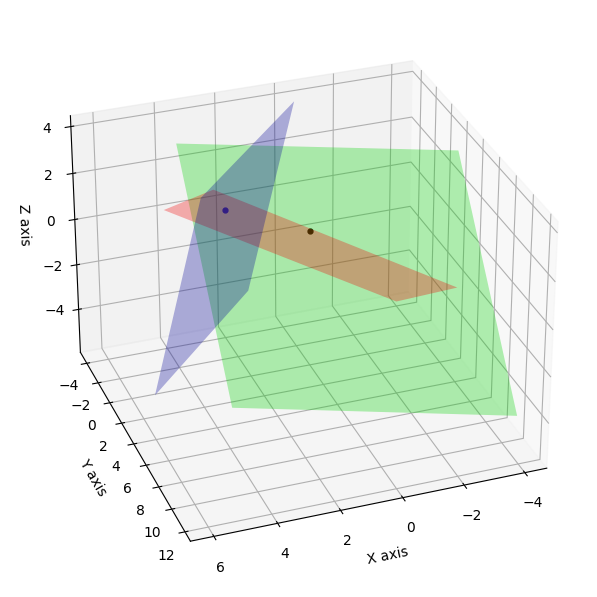

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,Matrix[0],'#FF0000',size=Size,Alpha=0.3,D=VectorY[0])
Plane3D(ax,Matrix[1],'#00FF00',size=Size,Alpha=0.3,D=VectorY[1])
Plane3D(ax,Matrix[2],'#0000FF',size=Size,Alpha=0.3,D=VectorY[2])
ViewPlot(ax,(30,70))
plt.show()

**About the Image**

Given that there are
* $M\in V^{3\times 3}$
* $\vec{y}\in V^3$
* $M\cdot \vec{x}=\vec{y}$
* $M=$ `Matrix`
* $\vec{y}=$ `VectorY`
* $\vec{x}=$ `VectorX`

Hyperplane in $n$ dimensions can be defined as
* $\forall\vec{n}\neq\vec{0}\,: s\in F\,:\{\vec{v}\cdot \vec{n}=s|\vec{v}\in V^N\}=$ Hyperplane in $V^N$

We can visualizing the Matrix $M$, a Vector $\vec{x}$ and a Vector $\vec{y}$ using Hyperplane Formula in 3D space.
* $x_1\cdot \begin{bmatrix}m_{1,1}\\m_{2,1}\\m_{3,1}\end{bmatrix}+x_2\cdot \begin{bmatrix}m_{1,2}\\m_{2,2}\\m_{3,2}\end{bmatrix}+x_3\cdot \begin{bmatrix}m_{1,3}\\m_{2,3}\\m_{3,3}\end{bmatrix}=\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}$

There are 3 Planes

$\begin{matrix}
&\circ&\text{Red Plane}  &: &x_1m_{1,1}+x_2m_{1,2}+x_3m_{1,3}=y_1\\
&\circ&\text{Green Plane}&: &x_1m_{2,1}+x_2m_{2,2}+x_3m_{2,3}=y_2\\
&\circ&\text{Blue Plane} &: &x_1m_{3,1}+x_2m_{3,2}+x_3m_{3,3}=y_3\\
\end{matrix}$

After operate `GaussElimination(Matrix)`
* $\text{rref}(M)=I$
* $I$ is 3 Dimensional Identity Matrix

This means that there exist a unique solution of $M\cdot \vec{x}$ which is `VectorX`

Implies that
* $\{\,\vec{r}_1,\vec{r}_2,\vec{r}_3\,\}=\{$ Row $\vec{v}$ of $M\,\}$
* $\vec{x}\cdot\vec{r}_1=y_1\implies \vec{x}\in $ Red Plane
* $\vec{x}\cdot\vec{r}_2=y_2\implies \vec{x}\in $ Green Plane
* $\vec{x}\cdot\vec{r}_3=y_3\implies \vec{x}\in $ Blue Plane

We can conclude that
* $\exists!\vec{x}\in V^N\,:\vec{x}=$ Red Plane $\cap$ Green Plane $\cap$ Blue Plane

You can read more about the Euclidean Geometry of 3D space in
1. Plane in 2D and 3D.ipynb: https://colab.research.google.com/drive/1CRtPo_0NUZ85aK6q-GnsE5Pa2zmRGAEE?usp=sharing
2. Projection in 2D and 3D.ipynb: https://colab.research.google.com/drive/1X2VB8FdHlG6v9zvFOvKayTdZovFYNIX8?usp=sharing

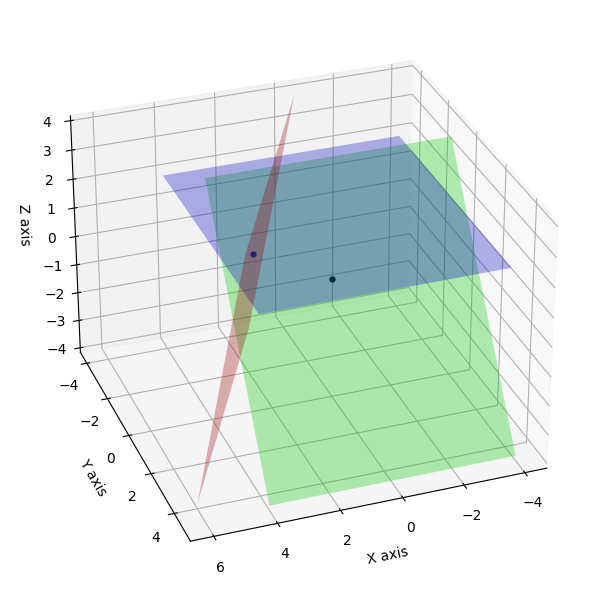

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,RowEchelonB[0],'#FF0000',size=Size,Alpha=0.3,D=VectorXB[0])
Plane3D(ax,RowEchelonB[1],'#00FF00',size=Size,Alpha=0.3,D=VectorXB[1])
Plane3D(ax,RowEchelonB[2],'#0000FF',size=Size,Alpha=0.3,D=VectorXB[2])
ViewPlot(ax,(30,70))
plt.show()

**About the Image**

There are
* $\text{ref}(M)=\hat{M}$ is the matrix that transformed by `GaussElimination_NoBack` which does not compute back-substitution algorithm.
* $\hat{y}$ is the vector that transformed by `GaussElimination_NoBack` which does not compute back-substitution algorithm.
* $\forall i,j\in\{1,...,N\}\,:\hat{M}(i,j)=\hat{m}_{i,j}$

Even though, $\text{rref}(M)\neq\hat{M}$ and $\hat{y}\neq\vec{y}$

$\begin{matrix}
&\circ&\text{Red Plane}  &: &x_1\hat{m}_{1,1}+x_2\hat{m}_{1,2}+x_3\hat{m}_{1,3}=\hat{y}_1\\
&\circ&\text{Green Plane}&: &x_1\hat{m}_{2,1}+x_2\hat{m}_{2,2}+x_3\hat{m}_{2,3}=\hat{y}_2\\
&\circ&\text{Blue Plane} &: &x_1\hat{m}_{3,1}+x_2\hat{m}_{3,2}+x_3\hat{m}_{3,3}=\hat{y}_3\\
\end{matrix}$

The intersection between 3 different planes is also the same vector $\vec{x}$ as shown below
* $\vec{x}=$ Red Plane $\cap$ Green Plane $\cap$ Blue Plane

In fact, every process within Gauss Elimination algorithm preserve the information about the intersection every hyperplane that encoded in $M\cdot\vec{x}=\vec{y}$
* $M\cdot\vec{x}=\vec{y}$
* $\text{ref}(M)\cdot\vec{x}=\hat{y}$
* $\text{rref}(M)\cdot\vec{x}=\vec{x}$



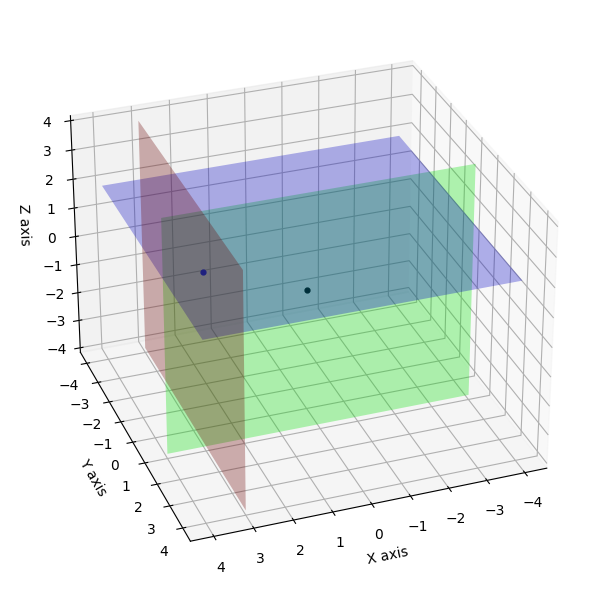

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,RowEchelon[0],'#FF0000',size=Size,Alpha=0.3,D=VectorX[0])
Plane3D(ax,RowEchelon[1],'#00FF00',size=Size,Alpha=0.3,D=VectorX[1])
Plane3D(ax,RowEchelon[2],'#0000FF',size=Size,Alpha=0.3,D=VectorX[2])
ViewPlot(ax,(30,70))
plt.show()

**About the Image**

Define
* $\{\vec{r}_1,\vec{r}_2,\vec{r}_3\}=\{$ Row $\vec{v}$ of $\text{rref}(M)\,\}$
* Red Plane $=\{\vec{v}\cdot\vec{r}_1=x_1|\vec{v}\in \mathbb{R}^3\}$
* Green Plane $=\{\vec{v}\cdot\vec{r}_2=x_2|\vec{v}\in \mathbb{R}^3\}$
* Blue Plane $=\{\vec{v}\cdot\vec{r}_3=x_3|\vec{v}\in \mathbb{R}^3\}$

Because of this conjecture
* $M\cdot\vec{x}=\vec{y}$
* $\text{ref}(M)\cdot\vec{x}=\hat{y}$
* $\text{rref}(M)\cdot\vec{x}=\vec{x}$

We can conclude that
* $\vec{x}=$ Red Plane $\cap$ Green Plan $\cap$ Blue Plane

Note that
* In the future, I will prove this conjecture in my "Linear Algebra" series.


###Example in $V^{3}$ with `numpy`

In [ ]:
NumpyVector = np.linalg.solve(Matrix, VectorY)
print(NumpyVector)
print(VectorX)
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

[3. 1. 2.]
[3. 1. 2.]


In [ ]:
DisplayResult(Matrix,RowEchelon,NumpyVector,VectorY)

Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[ 3.  2. -4.]
 [ 2.  3.  3.]
 [ 5. -3.  1.]]

Matrix in Row Echelon Form
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0. -0.  1.]]

Augmented matrix in Row Echelon Form
[[ 1.  0.  0.  3.]
 [ 0.  1.  0.  1.]
 [-0. -0.  1.  2.]]

M * x = y
M * x = [ 3. 15. 14.]
y = [ 3. 15. 14.]
True

rref(M) * x = x
x = [3. 1. 2.]
rref(M) * x = [3. 1. 2.]
True


###Example in $V^3$ with `scipy`

In [ ]:
from scipy.linalg import lu
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

a = np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1)

pl, u = lu(a, permute_l=True)
print(u)

[[  5.          -3.           1.          14.        ]
 [  0.           4.2          2.6          9.4       ]
 [  0.           0.          -6.95238095 -13.9047619 ]]


In [ ]:
u=u.T
VectorXB=u[-1]
RowEchelon=u[:-1].T

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[ 3.  2. -4.]
 [ 2.  3.  3.]
 [ 5. -3.  1.]]

Matrix in Row Echelon Form
[[ 5.         -3.          1.        ]
 [ 0.          4.2         2.6       ]
 [ 0.          0.         -6.95238095]]

Augmented matrix in Row Echelon Form
[[  5.          -3.           1.          14.        ]
 [  0.           4.2          2.6          9.4       ]
 [  0.           0.          -6.95238095 -13.9047619 ]]

M * x = y
M * x = [ 14.          9.4       -13.9047619]
y = [ 14.          9.4       -13.9047619]
True


###Example in $V^3$ with `sympy`

In [ ]:
import sympy as sp
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

m = sp.Matrix(np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1))

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, 0, 3.00000000000000], [0, 1, 0, 1.00000000000000], [0, 0, 1, 2.00000000000000]]) (0, 1, 2)


In [ ]:
# https://stackoverflow.com/questions/53525970/convert-matrix-elements-to-float-in-python
AugmentedMatrix=np.array(m_rref).astype(float).T
VectorX=AugmentedMatrix[-1]
RowEchelon=AugmentedMatrix[:-1].T

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[ 3.  2. -4.]
 [ 2.  3.  3.]
 [ 5. -3.  1.]]

Matrix in Row Echelon Form
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Augmented matrix in Row Echelon Form
[[1. 0. 0. 3.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]]

M * x = y
M * x = [ 3. 15. 14.]
y = [ 3. 15. 14.]
True

rref(M) * x = x
x = [3. 1. 2.]
rref(M) * x = [3. 1. 2.]
True


##Example in $V^N$

###Example in $V^N$

In [ ]:
# Random Data
Std=1
Mean=0
Size=5
# Modified Matrix
RowEchelon=np.random.normal(Mean,Std,(Size,Size))
VectorX=np.random.normal(Mean,Std,Size)
# Original Matrix
Matrix=RowEchelon.copy()
VectorY=VectorX.copy()

In [ ]:
print('det(M) =',np.linalg.det(Matrix))

det(M) = -8.120917796194453


In [ ]:
# M * x = y
# x = GaussElimination(M,y)
GaussElimination(RowEchelon,VectorX)
RowEchelon=np.around(RowEchelon,8)

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[ 1.12400104 -0.09952546 -0.35420854  1.39408977  0.61637577]
 [-0.35267605  1.31142796 -0.53106605  0.42859216 -0.67031175]
 [ 1.21850829 -0.05518297  0.15689114  1.33283048 -0.99186843]
 [ 0.26510721  0.22547603 -0.59605381 -1.43233653 -0.44254264]
 [ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]]

Matrix in Row Echelon Form
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [-0. -0.  1. -0. -0.]
 [ 0.  0.  0.  1.  0.]
 [-0. -0. -0. -0.  1.]]

Augmented matrix in Row Echelon Form
[[ 1.          0.          0.          0.          0.         -0.73188427]
 [ 0.          1.          0.          0.          0.          0.80014528]
 [-0.         -0.          1.         -0.         -0.          0.27082326]
 [ 0.          0.          0.          1.          0.          0.10933123]
 [-0.         -0.         -0.         -0.          1.         -0.28

###Example of $V^N$ with no Back Substitution

In [ ]:
RowEchelonB=Matrix.copy()
VectorXB=VectorY.copy()
VectorYB=VectorXB.copy()

In [ ]:
GaussElimination_NoBack(RowEchelonB,VectorXB)

In [ ]:
RowEchelonB=np.around(RowEchelonB,8)

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelonB,VectorX,VectorXB)


Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[ 1.12400104 -0.09952546 -0.35420854  1.39408977  0.61637577]
 [-0.35267605  1.31142796 -0.53106605  0.42859216 -0.67031175]
 [ 1.21850829 -0.05518297  0.15689114  1.33283048 -0.99186843]
 [ 0.26510721  0.22547603 -0.59605381 -1.43233653 -0.44254264]
 [ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]]

Matrix in Row Echelon Form
[[ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]
 [ 0.          1.6256144  -0.60201003  0.12751745 -0.67510313]
 [ 0.          0.         -0.54668703 -1.20517893 -0.44338393]
 [ 0.          0.          0.          3.62113045  0.60901071]
 [ 0.          0.          0.          0.         -1.85419996]]

Augmented matrix in Row Echelon Form
[[ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981 -0.22186925]
 [ 0.          1.6256144  -0.60201003  0.12751745 -0.

###Example in $V^{N}$ with `numpy`

In [ ]:
NumpyVector = np.linalg.solve(Matrix, VectorY)
print(NumpyVector)
print(VectorX)
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

[-0.73188427  0.80014528  0.27082326  0.10933123 -0.28365021]
[-0.73188427  0.80014528  0.27082326  0.10933123 -0.28365021]


In [ ]:
DisplayResult(Matrix,RowEchelon,NumpyVector,VectorY)

Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[ 1.12400104 -0.09952546 -0.35420854  1.39408977  0.61637577]
 [-0.35267605  1.31142796 -0.53106605  0.42859216 -0.67031175]
 [ 1.21850829 -0.05518297  0.15689114  1.33283048 -0.99186843]
 [ 0.26510721  0.22547603 -0.59605381 -1.43233653 -0.44254264]
 [ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]]

Matrix in Row Echelon Form
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [-0. -0.  1. -0. -0.]
 [ 0.  0.  0.  1.  0.]
 [-0. -0. -0. -0.  1.]]

Augmented matrix in Row Echelon Form
[[ 1.          0.          0.          0.          0.         -0.73188427]
 [ 0.          1.          0.          0.          0.          0.80014528]
 [-0.         -0.          1.         -0.         -0.          0.27082326]
 [ 0.          0.          0.          1.          0.          0.10933123]
 [-0.         -0.         -0.         -0.          1.         -0.28

###Example in $V^N$ with `scipy`

In [ ]:
from scipy.linalg import lu
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

a = np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1)

pl, u = lu(a, permute_l=True)
print(u)

[[ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981 -0.22186925]
 [ 0.          1.6256144  -0.60201003  0.12751745 -0.67510313  1.34312415]
 [ 0.          0.         -0.54668703 -1.20517893 -0.44338393 -0.15405331]
 [ 0.          0.          0.          3.62113045  0.60901071  0.22315661]
 [ 0.          0.          0.          0.         -1.85419996  0.52594422]]


In [ ]:
u=u.T
VectorXB=u[-1]
RowEchelon=u[:-1].T

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[ 1.12400104 -0.09952546 -0.35420854  1.39408977  0.61637577]
 [-0.35267605  1.31142796 -0.53106605  0.42859216 -0.67031175]
 [ 1.21850829 -0.05518297  0.15689114  1.33283048 -0.99186843]
 [ 0.26510721  0.22547603 -0.59605381 -1.43233653 -0.44254264]
 [ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]]

Matrix in Row Echelon Form
[[ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]
 [ 0.          1.6256144  -0.60201003  0.12751745 -0.67510313]
 [ 0.          0.         -0.54668703 -1.20517893 -0.44338393]
 [ 0.          0.          0.          3.62113045  0.60901071]
 [ 0.          0.          0.          0.         -1.85419996]]

Augmented matrix in Row Echelon Form
[[ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981 -0.22186925]
 [ 0.          1.6256144  -0.60201003  0.12751745 -0.

###Example in $V^N$ with `sympy`

In [ ]:
import sympy as sp
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

m = sp.Matrix(np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1))

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, 0, 0, 0, -0.731884270710526], [0, 1, 0, 0, 0, 0.800145280114207], [0, 0, 1, 0, 0, 0.270823262247649], [0, 0, 0, 1, 0, 0.109331225203152], [0, 0, 0, 0, 1, -0.283650214592512]]) (0, 1, 2, 3, 4)


In [ ]:
# https://stackoverflow.com/questions/53525970/convert-matrix-elements-to-float-in-python
AugmentedMatrix=np.array(m_rref).astype(float).T
VectorX=AugmentedMatrix[-1]
RowEchelon=AugmentedMatrix[:-1].T

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[ 1.12400104 -0.09952546 -0.35420854  1.39408977  0.61637577]
 [-0.35267605  1.31142796 -0.53106605  0.42859216 -0.67031175]
 [ 1.21850829 -0.05518297  0.15689114  1.33283048 -0.99186843]
 [ 0.26510721  0.22547603 -0.59605381 -1.43233653 -0.44254264]
 [ 1.36096848  1.21243798 -0.27377112 -1.16184015 -0.01848981]]

Matrix in Row Echelon Form
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Augmented matrix in Row Echelon Form
[[ 1.          0.          0.          0.          0.         -0.73188427]
 [ 0.          1.          0.          0.          0.          0.80014528]
 [ 0.          0.          1.          0.          0.          0.27082326]
 [ 0.          0.          0.          1.          0.          0.10933123]
 [ 0.          0.          0.          0.          1.         -0.28365021]]

M * x = y
M * x

#Linear Equation with Infinite Solution

##Example in $V^3$


###Example in $V^3$

In [ ]:
# Random Data
Std=3
Mean=0
Size=3
# M * x = y
# M
RowEchelon=np.array([
    [1.0, 1.0, 1.0],
    [1.0, 2.0, 1.0],
    [2.0, 3.0, 2.0],
])
Matrix=RowEchelon.copy()
# x
VectorXTest=((np.random.normal(Mean,Std,Size)).astype(int)).astype(float)
VectorX=np.dot(Matrix,VectorXTest)
# M * x = y
VectorY=VectorX.copy()

In [ ]:
# M * x = y
# x = GaussElimination(M,y)
GaussElimination(RowEchelon,VectorX)
RowEchelon=np.around(RowEchelon,8)

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

Matrix in Row Echelon Form
[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]

Augmented matrix in Row Echelon Form
[[ 1.  0.  1. -6.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  0.  0.]]

M * x = y
M * x = [ -7.  -8. -15.]
y = [ -7.  -8. -15.]
True

rref(M) * x = x
x = [-6. -1.  0.]
rref(M) * x = [-6. -1.  0.]
True


In [ ]:
NonZero=SearchNonZero()*5
ls=list(VectorX)

'''
Given that
* r1 = first rrow vector of Matrix
# x * r1 = ls[0]

Implies that
# x1 + 0 * x2 + x3 = ls[0]
# x1 + x3 = ls[0]
# x1 = ls[0] - x3
# x3 = ls[0] - x1

In this case the solution of M * x = y is
# forall a in F: x = a * (1, 0, -1) +(0, 1, ls[0]) if M * x = y
'''

VectorS1=np.array([
    NonZero,
    ls[1],
    -1*NonZero+ls[0]
])

VectorS2=np.array([
    -1*NonZero+ls[0],
    ls[1],
    NonZero
])

DisplayResult(Matrix,RowEchelon,VectorS2,VectorY)
print()
print('It is noteworthly that when I replace VectorX by VectorS')
print('DisplayResult show that VectorS satisfy')
print('# M * x = y')
print('But it does not satisfy')
print('# M * x = x')
print('But it does equal to')
print('# M * x = rref(M) * VectorX')

Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

Matrix in Row Echelon Form
[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]

Augmented matrix in Row Echelon Form
[[  1.           0.           1.         -15.83009963]
 [  0.           1.           0.          -1.        ]
 [  0.           0.           0.           9.83009963]]

M * x = y
M * x = [ -7.  -8. -15.]
y = [ -7.  -8. -15.]
True

rref(M) * x = x
x = [-15.83009963  -1.           9.83009963]
rref(M) * x = [-6. -1.  0.]
False

It is noteworthly that when I scale VectorX by a random variable = VectorS
DisplayResult show that VectorS satisfy
# M * x = y
But it does not satisfy
# M * x = x


In [ ]:
DisplayResult(Matrix,RowEchelon,VectorS1,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

Matrix in Row Echelon Form
[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]

Augmented matrix in Row Echelon Form
[[  1.           0.           1.         -19.25031721]
 [  0.           1.           0.          -1.        ]
 [  0.           0.           0.          13.25031721]]

M * x = y
M * x = [ -7.  -8. -15.]
y = [ -7.  -8. -15.]
True

rref(M) * x = x
x = [-19.25031721  -1.          13.25031721]
rref(M) * x = [-6. -1.  0.]
False


###Example in $V^3$ with no Back Substitution

In [ ]:
RowEchelonB=Matrix.copy()
VectorXB=VectorY.copy()
VectorYB=VectorXB.copy()

In [ ]:
GaussElimination_NoBack(RowEchelonB,VectorXB)

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelonB,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

Matrix in Row Echelon Form
[[2.  3.  2. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]

Augmented matrix in Row Echelon Form
[[  2.    3.    2.  -15. ]
 [  0.    0.5   0.   -0.5]
 [  0.    0.    0.    0. ]]

M * x = y
M * x = [-15.   -0.5   0. ]
y = [-15.   -0.5   0. ]
True


###Matrix Visualization in 3D

In [ ]:
Size=10

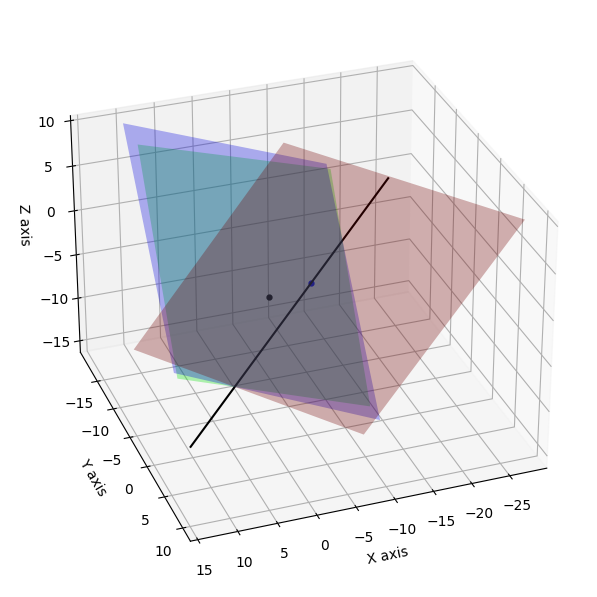

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,Matrix[0],'#FF0000',size=Size,Alpha=0.3,D=VectorY[0])
Plane3D(ax,Matrix[1],'#00FF00',size=Size,Alpha=0.3,D=VectorY[1])
Plane3D(ax,Matrix[2],'#0000FF',size=Size,Alpha=0.3,D=VectorY[2])
Line3D(ax,VectorS1,'#000000',VectorS2)
ViewPlot(ax,(30,70))
plt.show()

**About the Image**

Given that there are
* $M\in \mathbb{R}^{3\times 3}$
* $\vec{y}\in \mathbb{R}^3$
* $M\cdot \vec{x}=\vec{y}$
* $M=$ `Matrix`
* $\vec{y}=$ `VectorY`
* $\vec{x}=$ `VectorX`

Hyperplane in $n$ dimensions can be defined as
* $\forall\vec{n}\neq\vec{0}\,: s\in F\,:\{\vec{v}\cdot \vec{n}=s|\vec{v}\in V^N\}=$ Hyperplane in $V^N$

We can visualizing the Matrix $M$, a Vector $\vec{x}$ and a Vector $\vec{y}$ using Hyperplane Formula in 3D space.
* $x_1\cdot \begin{bmatrix}m_{1,1}\\m_{2,1}\\m_{3,1}\end{bmatrix}+x_2\cdot \begin{bmatrix}m_{1,2}\\m_{2,2}\\m_{3,2}\end{bmatrix}+x_3\cdot \begin{bmatrix}m_{1,3}\\m_{2,3}\\m_{3,3}\end{bmatrix}=\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}$

There are 3 Planes

$\begin{matrix}
&\circ&\text{Red Plane}  &: &x_1m_{1,1}+x_2m_{1,2}+x_3m_{1,3}=y_1\\
&\circ&\text{Green Plane}&: &x_1m_{2,1}+x_2m_{2,2}+x_3m_{2,3}=y_2\\
&\circ&\text{Blue Plane} &: &x_1m_{3,1}+x_2m_{3,2}+x_3m_{3,3}=y_3\\
\end{matrix}$

After operate `GaussElimination(Matrix)`
* $\text{rref}(M)\neq I$

The reason is because Row vector of $M$ is Linear Dependence, such that
* $\exists\vec{v}_i\in S\,:\vec{v}_i\in\text{span}(S-\vec{v}_i)\iff S$ is Linear Dependence

After transforming $M$ to $\text{rref}(M)$ , the $\vec{r}_i$ is transformed by linear combination of other row vectors, implies that
* $\vec{0}\in\text{rref}(M)$
* $\vec{0}\not\in I$
* $\therefore \text{rref}(M)\neq I$

In this case (where we use real number in this example), there are infinitely many solutions of $M\cdot \vec{x}$ which is `VectorX`

Implies that
* $\{\,\vec{r}_1,\vec{r}_2,\vec{r}_3\,\}=\{$ Row $\vec{v}$ of $M\,\}$
* $\vec{x}\in X$
* $\vec{x}\cdot\vec{r}_1=y_1\implies \vec{x}\in $ Red Plane
* $\vec{x}\cdot\vec{r}_2=y_2\implies \vec{x}\in $ Green Plane
* $\vec{x}\cdot\vec{r}_3=y_3\implies \vec{x}\in $ Blue Plane

We can conclude that
* $\exists X\subset V^N\,:|X|>1\,:X=$ Red Plane $\cap$ Green Plane $\cap$ Blue Plane

Note that
* $X$ is Subspace if and only if it have $\vec{0}$.

You can read more about the Euclidean Geometry of 3D space in
1. Plane in 2D and 3D.ipynb: https://colab.research.google.com/drive/1CRtPo_0NUZ85aK6q-GnsE5Pa2zmRGAEE?usp=sharing
2. Projection in 2D and 3D.ipynb: https://colab.research.google.com/drive/1X2VB8FdHlG6v9zvFOvKayTdZovFYNIX8?usp=sharing

<ipython-input-204-d8b414126b9f>:12: RuntimeWarning: invalid value encountered in scalar divide
  X = -(b/a)*Y-(c/a)*Z+(d/a)*One


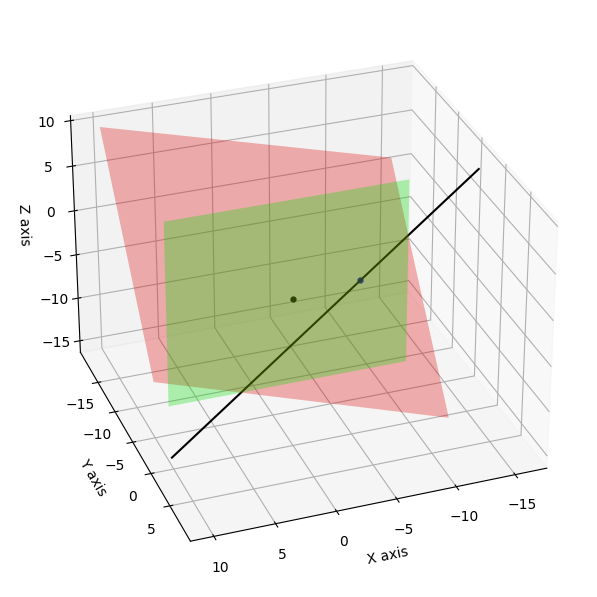

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,RowEchelonB[0],'#FF0000',size=Size,Alpha=0.3,D=VectorXB[0])
Plane3D(ax,RowEchelonB[1],'#00FF00',size=Size,Alpha=0.3,D=VectorXB[1])
Plane3D(ax,RowEchelonB[2],'#0000FF',size=Size,Alpha=0.3,D=VectorXB[2])
Line3D(ax,VectorS1,'#000000',VectorS2)
ViewPlot(ax,(30,70))
plt.show()

**About the Image**

There are
* $\text{ref}(M)=\hat{M}$ is the matrix that transformed by `GaussElimination_NoBack` which does not compute back-substitution algorithm.
* $\hat{y}$ is the vector that transformed by `GaussElimination_NoBack` which does not compute back-substitution algorithm.
* $\forall i,j\in\{1,...,N\}\,:\hat{M}(i,j)=\hat{m}_{i,j}$

Even though, $\text{rref}(M)\neq\hat{M}$ and $\hat{y}\neq\vec{y}$

$\begin{matrix}
&\circ&\text{Red Plane}  &: &x_1\hat{m}_{1,1}+x_2\hat{m}_{1,2}+x_3\hat{m}_{1,3}=\hat{y}_1\\
&\circ&\text{Green Plane}&: &x_1\hat{m}_{2,1}+x_2\hat{m}_{2,2}+x_3\hat{m}_{2,3}=\hat{y}_2\\
&\circ&\text{Blue Plane} &: &x_1\hat{m}_{3,1}+x_2\hat{m}_{3,2}+x_3\hat{m}_{3,3}=\hat{y}_3\\
\end{matrix}$

The intersection between 3 different planes is also the same set vector $X$ as shown below
* $X=$ Red Plane $\cap$ Green Plane $\cap$ Blue Plane

In fact, every process within Gauss Elimination algorithm preserve the information about the intersection every hyperplane that encoded in $M\cdot\vec{x}=\vec{y}$
* $M\cdot\vec{x}=\vec{y}$
* $\text{ref}(M)\cdot\vec{x}=\hat{y}$
* $\text{rref}(M)\cdot\vec{x}=\vec{x}$

Another noteworthly thing is that intuitively we likely think that the intersection between 2 planes in 3D space is just 1D line and in general
* $H_a,H_b\in N-1$ D Plane $\,:H_a\cap H_b\in N-2$ D Plane

Because the main focus of this documentation is to show how to interpret and the practical application of Gauss Elimination, I will prove this result in my future project in "Linear Algebra" series.


<ipython-input-204-d8b414126b9f>:12: RuntimeWarning: invalid value encountered in scalar divide
  X = -(b/a)*Y-(c/a)*Z+(d/a)*One


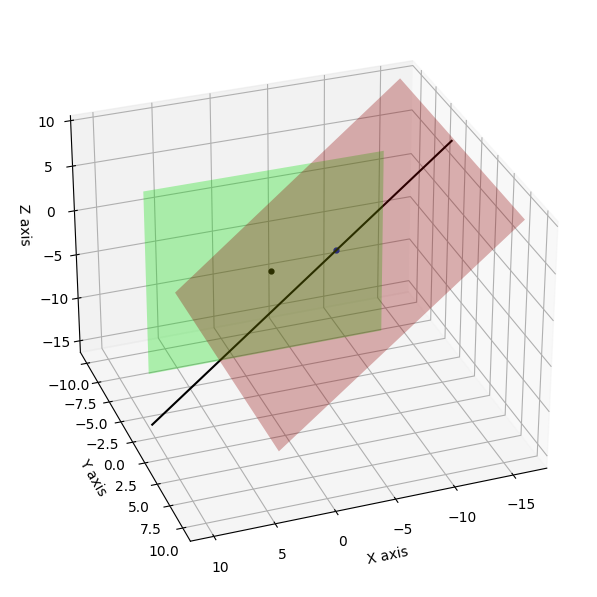

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,RowEchelon[0],'#FF0000',size=Size,Alpha=0.3,D=VectorX[0])
Plane3D(ax,RowEchelon[1],'#00FF00',size=Size,Alpha=0.3,D=VectorX[1])
Plane3D(ax,RowEchelon[2],'#0000FF',size=Size,Alpha=0.3,D=VectorX[2])
Line3D(ax,VectorS1,'#000000',VectorS2)
ViewPlot(ax,(30,70))
plt.show()

**About the Image**

Define
* $\{\vec{r}_1,\vec{r}_2,\vec{r}_3\}=\{$ Row $\vec{v}$ of $\text{rref}(M)\,\}$
* Red Plane $=\{\vec{v}\cdot\vec{r}_1=x_1|\vec{v}\in \mathbb{R}^3\}$
* Green Plane $=\{\vec{v}\cdot\vec{r}_2=x_2|\vec{v}\in \mathbb{R}^3\}$
* Blue Plane $=\{\vec{v}\cdot\vec{r}_3=x_3|\vec{v}\in \mathbb{R}^3\}$

Because of this conjecture
* $M\cdot\vec{x}=\vec{y}$
* $\text{ref}(M)\cdot\vec{x}=\hat{y}$
* $\text{rref}(M)\cdot\vec{x}=\vec{x}$

We can conclude that
* $X=$ Red Plane $\cap$ Green Plan $\cap$ Blue Plane

Note that
* In the future, I will prove this conjecture in my "Linear Algebra" series.


###Example in $V^{3}$ with `numpy`

In [ ]:
try:
  NumpyVector = np.linalg.solve(Matrix, VectorY)
  print(NumpyVector)
  print(VectorX)
  DisplayResult(Matrix,RowEchelon,NumpyVector,VectorY)
except:
  print('The Row Vector of M is Linear Dependence')
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

The Row Vector of M is Linear Dependence


###Example in $V^3$ with `scipy`

In [ ]:
from scipy.linalg import lu
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

a = np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1)

pl, u = lu(a, permute_l=True)
print(u)

[[  2.    3.    2.  -15. ]
 [  0.    0.5   0.   -0.5]
 [  0.    0.    0.    0. ]]


In [ ]:
u=u.T
VectorXB=u[-1]
RowEchelon=u[:-1].T

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

Matrix in Row Echelon Form
[[2.  3.  2. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]

Augmented matrix in Row Echelon Form
[[  2.    3.    2.  -15. ]
 [  0.    0.5   0.   -0.5]
 [  0.    0.    0.    0. ]]

M * x = y
M * x = [-15.   -0.5   0. ]
y = [-15.   -0.5   0. ]
True


###Example in $V^3$ with `sympy`

In [ ]:
import sympy as sp
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

m = sp.Matrix(np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1))

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, 1.00000000000000, -6.00000000000000], [0, 1, 0, -1.00000000000000], [0, 0, 0, 0]]) (0, 1)


In [ ]:
# https://stackoverflow.com/questions/53525970/convert-matrix-elements-to-float-in-python
AugmentedMatrix=np.array(m_rref).astype(float).T
VectorX=AugmentedMatrix[-1]
RowEchelon=AugmentedMatrix[:-1].T

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[1. 1. 1.]
 [1. 2. 1.]
 [2. 3. 2.]]

Matrix in Row Echelon Form
[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]

Augmented matrix in Row Echelon Form
[[ 1.  0.  1. -6.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  0.  0.]]

M * x = y
M * x = [ -7.  -8. -15.]
y = [ -7.  -8. -15.]
True

rref(M) * x = x
x = [-6. -1.  0.]
rref(M) * x = [-6. -1.  0.]
True


##Example in $V^N$

###Example in $V^N$

In [ ]:
# Random Data
Std=1
Mean=0
Size=5
# Modified Matrix
Row1=np.random.normal(Mean,Std,Size)
Row2=np.random.normal(Mean,Std,Size)
Row3=np.random.normal(Mean,Std,Size)
Row4=np.random.normal(Mean,Std,Size)
RowEchelon=np.array([
    Row1,
    Row2,
    Row3,
    Row4,
    4*Row1-5*Row2
])
VectorX=np.dot(RowEchelon,np.random.normal(Mean,Std,Size))
# Original Matrix
Matrix=RowEchelon.copy()
VectorY=VectorX.copy()

In [ ]:
GaussElimination(RowEchelon,VectorX)


In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY,P1=13,P2=13)
# P1 = Precision for Test No.1

Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[-0.6554479  -0.05556262  0.71676029  0.8256478  -1.44685589]
 [ 0.4008179   1.17559165 -0.29910762 -0.84809146 -1.28608898]
 [ 0.79519753 -0.09430571 -0.10547944  0.89363861  1.33122181]
 [-1.35449169 -0.93987933 -0.47500468 -0.10679714  0.65075276]
 [-4.62588112 -6.10020873  4.36257927  7.54304852  0.64302132]]

Matrix in Row Echelon Form
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Augmented matrix in Row Echelon Form
[[ 1.          0.          0.          0.          0.         -1.76637945]
 [ 0.          1.          0.          0.          0.          5.33393741]
 [ 0.          0.          1.          0.          0.          2.32716403]
 [ 0.          0.          0.          1.          0.          1.60653445]
 [ 0.          0.          0.          0.          1.          3.42857143]]

M * x = y
M * x

In [ ]:
print('Note that Matrix Multiplication is not communicative.')
print('Mx =',np.dot(Matrix,VectorX))
print('xM =',np.dot(VectorX,Matrix))
print('y =',VectorY)

Note that Matrix Multiplication is not communicative.
Mx = [-1.10479622 -0.90547282  3.84674101 -1.666546    0.10817922]
xM = [-6.09567038 -2.49471847  0.89299355  0.11750276 -3.81403012]
y = [-1.10479622 -0.90547282  3.84674101 -1.666546    0.10817922]


###Example in $V^N$ with no Back Substitution

In [ ]:
RowEchelonB=Matrix.copy()
VectorXB=VectorY.copy()
VectorYB=VectorXB.copy()

In [ ]:
GaussElimination_NoBack(RowEchelonB,VectorXB)

In [ ]:
#RowEchelonB=np.around(RowEchelonB,8)

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelonB,VectorX,VectorXB,P=5)


Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[-0.6554479  -0.05556262  0.71676029  0.8256478  -1.44685589]
 [ 0.4008179   1.17559165 -0.29910762 -0.84809146 -1.28608898]
 [ 0.79519753 -0.09430571 -0.10547944  0.89363861  1.33122181]
 [-1.35449169 -0.93987933 -0.47500468 -0.10679714  0.65075276]
 [-4.62588112 -6.10020873  4.36257927  7.54304852  0.64302132]]

Matrix in Row Echelon Form
[[-4.62588112 -6.10020873  4.36257927  7.54304852  0.64302132]
 [ 0.         -1.14294289  0.64445602  2.19030262  1.44175837]
 [ 0.          0.         -1.27520422 -0.69361998  1.53003928]
 [ 0.          0.          0.          1.00509939  0.14777138]
 [ 0.          0.          0.          0.          0.        ]]

Augmented matrix in Row Echelon Form
[[-4.62588112e+00 -6.10020873e+00  4.36257927e+00  7.54304852e+00
   6.43021322e-01  1.08179221e-01]
 [ 0.00000000e+00 -1.142942

###Example in $V^{N}$ with `numpy`

In [ ]:
try:
  NumpyVector = np.linalg.solve(Matrix, VectorY)
  print(NumpyVector)
  print(VectorX)
  DisplayResult(Matrix,RowEchelon,NumpyVector,VectorY)
except:
  print('The Row Vector of M is Linear Dependence')
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

[ 0.99570027  1.20215018 -0.78094087  1.96358706  1.        ]
[ 2.13302721e+00 -4.99173975e-01 -2.06074878e+00  2.11060872e+00
  8.88178420e-16]
Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[-0.6554479  -0.05556262  0.71676029  0.8256478  -1.44685589]
 [ 0.4008179   1.17559165 -0.29910762 -0.84809146 -1.28608898]
 [ 0.79519753 -0.09430571 -0.10547944  0.89363861  1.33122181]
 [-1.35449169 -0.93987933 -0.47500468 -0.10679714  0.65075276]
 [-4.62588112 -6.10020873  4.36257927  7.54304852  0.64302132]]

Matrix in Row Echelon Form
[[ 1.          0.          0.          0.          1.13732694]
 [ 0.          1.          0.          0.         -1.70132415]
 [ 0.          0.          1.          0.         -1.2798079 ]
 [ 0.          0.          0.          1.          0.14702166]
 [ 0.          0.          0.          0.          0.        ]]

Augmented matrix in Row Echelon Form
[[ 1.          0.     

###Example in $V^N$ with `scipy`

In [ ]:
from scipy.linalg import lu
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

a = np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1)

pl, u = lu(a, permute_l=True)
print(u)

[[-4.62588112e+00 -6.10020873e+00  4.36257927e+00  7.54304852e+00
   6.43021322e-01  1.08179221e-01]
 [ 0.00000000e+00 -1.14294289e+00  6.44456018e-01  2.19030262e+00
   1.44175837e+00  3.86533721e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.27520422e+00 -6.93619975e-01
   1.53003928e+00  1.16391517e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00509939e+00
   1.47771383e-01  2.12137153e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.66133815e-16  7.77156117e-16]]


In [ ]:
u=u.T
VectorXB=u[-1]
RowEchelon=u[:-1].T

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[-0.6554479  -0.05556262  0.71676029  0.8256478  -1.44685589]
 [ 0.4008179   1.17559165 -0.29910762 -0.84809146 -1.28608898]
 [ 0.79519753 -0.09430571 -0.10547944  0.89363861  1.33122181]
 [-1.35449169 -0.93987933 -0.47500468 -0.10679714  0.65075276]
 [-4.62588112 -6.10020873  4.36257927  7.54304852  0.64302132]]

Matrix in Row Echelon Form
[[-4.62588112e+00 -6.10020873e+00  4.36257927e+00  7.54304852e+00
   6.43021322e-01]
 [ 0.00000000e+00 -1.14294289e+00  6.44456018e-01  2.19030262e+00
   1.44175837e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.27520422e+00 -6.93619975e-01
   1.53003928e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00509939e+00
   1.47771383e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.66133815e-16]]

Augmented matrix in Row Echelon Form
[[-4.62588112e+00 

###Example in $V^N$ with `sympy`

In [ ]:
import sympy as sp
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

m = sp.Matrix(np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1))

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, 0, 0, 0, -1.76637944763518], [0, 1, 0, 0, 0, 5.33393740520042], [0, 0, 1, 0, 0, 2.32716403295024], [0, 0, 0, 1, 0, 1.60653444936256], [0, 0, 0, 0, 1, 3.42857142857143]]) (0, 1, 2, 3, 4)


In [ ]:
# https://stackoverflow.com/questions/53525970/convert-matrix-elements-to-float-in-python
AugmentedMatrix=np.array(m_rref).astype(float).T
VectorX=AugmentedMatrix[-1]
RowEchelon=AugmentedMatrix[:-1].T

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[-0.6554479  -0.05556262  0.71676029  0.8256478  -1.44685589]
 [ 0.4008179   1.17559165 -0.29910762 -0.84809146 -1.28608898]
 [ 0.79519753 -0.09430571 -0.10547944  0.89363861  1.33122181]
 [-1.35449169 -0.93987933 -0.47500468 -0.10679714  0.65075276]
 [-4.62588112 -6.10020873  4.36257927  7.54304852  0.64302132]]

Matrix in Row Echelon Form
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Augmented matrix in Row Echelon Form
[[ 1.          0.          0.          0.          0.         -1.76637945]
 [ 0.          1.          0.          0.          0.          5.33393741]
 [ 0.          0.          1.          0.          0.          2.32716403]
 [ 0.          0.          0.          1.          0.          1.60653445]
 [ 0.          0.          0.          0.          1.          3.42857143]]

M * x = y
M * x

#Linear Equation with No Solution

##Example in $V^3$

###Example in $V^3$

In [ ]:
# M * x = y
# M
RowEchelon=np.array([
    [3.0, 2.0, 1.0],
    [1.0, 0.0, 1.0],
    [1.0, 1.0, 0.0],
])
Matrix=RowEchelon.copy()
# x
VectorX=np.array([-2,-1,-1.5])
VectorY=VectorX.copy()

In [ ]:
print('det(M)',np.linalg.det(Matrix))

det(M) -1.1102230246251573e-16


In [ ]:
GaussElimination_Show(RowEchelon,VectorX)


Initial Matrix
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
[[-2. ]
 [-1. ]
 [-1.5]]

Start Gauss-Jordan-Elimination

PartialPivot
Row 3.0
Row 1.0
Row 1.0
Pivot from the column No.0 = 3.0

Diagonal 0
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
[[-2. ]
 [-1. ]
 [-1.5]]
M[R][D] 1.0
M[D][D] 3.0
Scale -0.3333333333333333

Row 1
[[ 3.          2.          1.        ]
 [ 0.         -0.66666667  0.66666667]
 [ 1.          1.          0.        ]]
[[-2.        ]
 [-0.33333333]
 [-1.5       ]]
M[R][D] 1.0
M[D][D] 3.0
Scale -0.3333333333333333

Row 2
[[ 3.          2.          1.        ]
 [ 0.         -0.66666667  0.66666667]
 [ 0.          0.33333333 -0.33333333]]
[[-2.        ]
 [-0.33333333]
 [-0.83333333]]

PartialPivot
Row -0.6666666666666666
Row 0.33333333333333337
Pivot from the column No.1 = -0.6666666666666666

Diagonal 1
[[ 3.          2.          1.        ]
 [ 0.         -0.66666667  0.66666667]
 [ 0.          0.33333333 -0.33333333]]
[[-2.        ]
 [-0.33333333]
 [-0.83333333]]
M[R][D] 0.3333333

In [ ]:
RowEchelon

array([[ 1.,  0.,  1.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  0.]])

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY,P1=10)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Matrix in Row Echelon Form
[[ 1.  0.  1.]
 [ 0.  1. -1.]
 [ 0.  0.  0.]]

Augmented matrix in Row Echelon Form
[[ 1.   0.   1.  -1. ]
 [ 0.   1.  -1.   0.5]
 [ 0.   0.   0.  -1. ]]

M * x = y
M * x = [-3.  -2.  -0.5]
y = [-2.  -1.  -1.5]
False

rref(M) * x = x
x = [-1.   0.5 -1. ]
rref(M) * x = [-2.   1.5  0. ]
False


###Example in $V^3$ with no Back Substitution

In [ ]:
RowEchelonB=Matrix.copy()
VectorXB=VectorY.copy()
VectorYB=VectorXB.copy()

In [ ]:
GaussElimination_NoBack(RowEchelonB,VectorXB)

In [ ]:
#RowEchelonB=np.around(RowEchelonB,8)

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelonB,VectorX,VectorXB)


Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Matrix in Row Echelon Form
[[ 3.          2.          1.        ]
 [ 0.         -0.66666667  0.66666667]
 [ 0.          0.          0.        ]]

Augmented matrix in Row Echelon Form
[[ 3.          2.          1.         -2.        ]
 [ 0.         -0.66666667  0.66666667 -0.33333333]
 [ 0.          0.          0.         -1.        ]]

M * x = y
M * x = [-3. -1.  0.]
y = [-2.         -0.33333333 -1.        ]
False


###Matrix Visualization

In [ ]:
Size=4

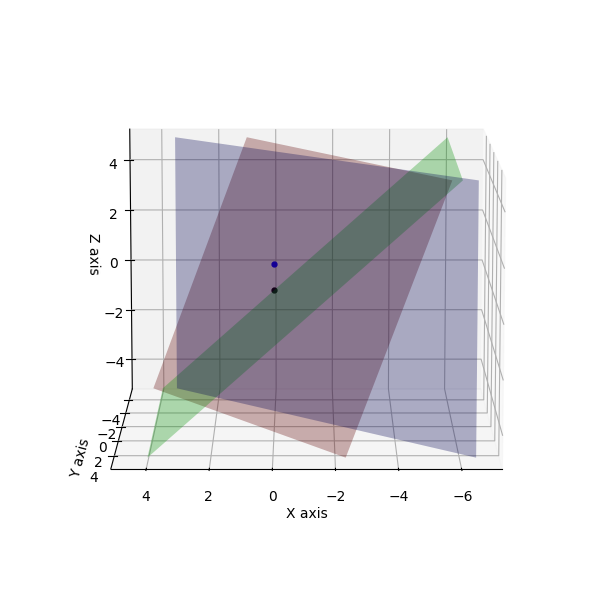

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,Matrix[0],'#FF0000',size=Size,Alpha=0.3,D=VectorY[0])
Plane3D(ax,Matrix[1],'#00FF00',size=Size,Alpha=0.3,D=VectorY[1])
Plane3D(ax,Matrix[2],'#0000FF',size=Size,Alpha=0.3,D=VectorY[2])
ViewPlot(ax,(10,90))
plt.show()

**About the Image**

There are 3 planes.

$\begin{matrix}
&\circ&\text{Red Plane}  &: &\vec{x}\cdot\vec{r}_1&=&x_1m_{1,1}+x_2m_{1,2}+x_3m_{1,3}=y_1\\
&\circ&\text{Green Plane}&: &\vec{x}\cdot\vec{r}_2&=&x_1m_{2,1}+x_2m_{2,2}+x_3m_{2,3}=y_2\\
&\circ&\text{Blue Plane} &: &\vec{x}\cdot\vec{r}_3&=&x_1m_{3,1}+x_2m_{3,2}+x_3m_{3,3}=y_3\\
\end{matrix}$

Where
* $\{\vec{r}_1,\vec{r}_2,\vec{r}_3\}=\{$ Row $\vec{v}$ of $M\,\}$

There is no solution of $\vec{x}$ such that
* $\vec{x}\in$ Red Plane $\cap$ Green Plane $\cap$ Blue Plane

It is also noteworthly that when Gauss Elimination transform $M$ and $\vec{y}$ such that
* $\text{GE}:\{M,\vec{y}\}\to\{\text{rref}(M),\vec{x}\}$

This formula is false, such that
* $\text{rref}(M)\cdot\vec{x}\neq\vec{x}$

I will prove this conjecture in my Future Linear Algebra project.

<ipython-input-12-d8b414126b9f>:12: RuntimeWarning: invalid value encountered in scalar divide
  X = -(b/a)*Y-(c/a)*Z+(d/a)*One
<ipython-input-12-d8b414126b9f>:12: RuntimeWarning: divide by zero encountered in scalar divide
  X = -(b/a)*Y-(c/a)*Z+(d/a)*One


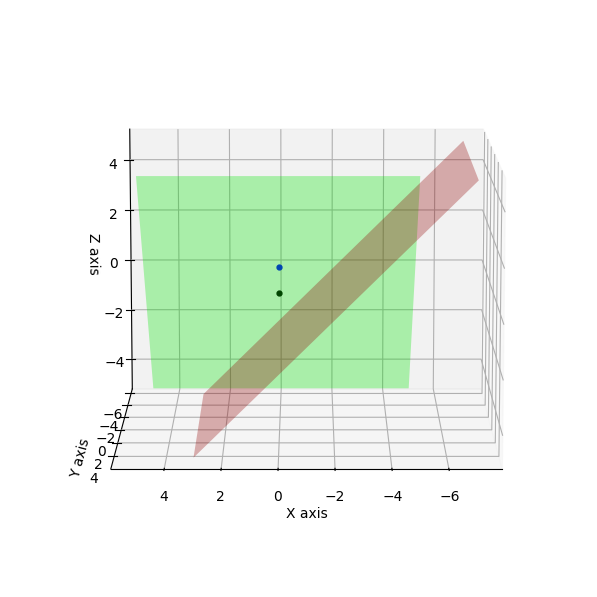

In [ ]:
fig = plt.figure(figsize=[10,10*(3/4)])
ax = fig.add_subplot(111, projection='3d')
Origin(ax)
Point3D(ax,VectorX,'#0000FF')
Plane3D(ax,RowEchelon[0],'#FF0000',size=Size,Alpha=0.3,D=VectorY[0])
Plane3D(ax,RowEchelon[1],'#00FF00',size=Size,Alpha=0.3,D=VectorY[1])
Plane3D(ax,RowEchelon[2],'#0000FF',size=Size,Alpha=0.3,D=VectorY[2])
ViewPlot(ax,(10,90))
plt.show()

**About the Image**

There are 3 planes.

$\begin{matrix}
&\circ&\text{Red Plane}  &: &\vec{x}\cdot\vec{r}_1&=&x_1m_{1,1}+x_2m_{1,2}+x_3m_{1,3}=y_1\\
&\circ&\text{Green Plane}&: &\vec{x}\cdot\vec{r}_2&=&x_1m_{2,1}+x_2m_{2,2}+x_3m_{2,3}=y_2\\
&\circ&\text{Blue Plane} &: &\vec{x}\cdot\vec{r}_3&=&x_1m_{3,1}+x_2m_{3,2}+x_3m_{3,3}=y_3\\
\end{matrix}$

Where
* $\{\vec{r}_1,\vec{r}_2,\vec{r}_3\}=\{$ Row $\vec{v}$ of $M\,\}$

After transforming $M$ to $\text{rref}(M)$ the Blue plane disappear because $\{$ Row $\vec{v}$ of $M\,\}$ is Linear Dependence, such that
* $\vec{r}_3\in\text{span}(\vec{r}_1,\vec{r}_2)$
* $\exists \vec{u}\in\text{span}(\vec{r}_1,\vec{r}_2)\,:\vec{r}_3-\vec{u}=\vec{0}$

###Example in $V^{3}$ with `numpy`

In [ ]:
try:
  NumpyVector = np.linalg.solve(Matrix, VectorY)
  print(NumpyVector)
  print(VectorX)
  DisplayResult(Matrix,RowEchelon,NumpyVector,VectorY)
except:
  print('The Row Vector of M is Linear Dependence')
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

[ 1.80143985e+16 -1.80143985e+16 -1.80143985e+16]
[0. 0. 1.]
Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Matrix in Row Echelon Form
[[ 1.  0.  1.]
 [ 0.  1. -1.]
 [ 0.  0.  0.]]

Augmented matrix in Row Echelon Form
[[ 1.00000000e+00  0.00000000e+00  1.00000000e+00  1.80143985e+16]
 [ 0.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.80143985e+16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.80143985e+16]]

M * x = y
M * x = [4. 4. 0.]
y = [-2.  -1.  -1.5]
False

rref(M) * x = x
x = [ 1.80143985e+16 -1.80143985e+16 -1.80143985e+16]
rref(M) * x = [ 4. -4.  0.]
False


###Example in $V^3$ with `scipy`

In [ ]:
from scipy.linalg import lu
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

a = np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1)

pl, u = lu(a, permute_l=True)
print(u)

[[ 3.00000000e+00  2.00000000e+00  1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00 -6.66666667e-01  6.66666667e-01 -3.33333333e-01]
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-17 -1.00000000e+00]]


In [ ]:
u=u.T
VectorXB=u[-1]
RowEchelon=u[:-1].T

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Matrix in Row Echelon Form
[[ 3.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00 -6.66666667e-01  6.66666667e-01]
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-17]]

Augmented matrix in Row Echelon Form
[[ 3.00000000e+00  2.00000000e+00  1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00 -6.66666667e-01  6.66666667e-01 -3.33333333e-01]
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-17 -1.00000000e+00]]

M * x = y
M * x = [-3.00000000e+00 -1.00000000e+00 -5.55111512e-17]
y = [-2.         -0.33333333 -1.        ]
False


###Example in $V^3$ with `sympy`

In [ ]:
import sympy as sp
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

m = sp.Matrix(np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1))

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, 1.00000000000000, 0], [0, 1, -1.00000000000000, 0], [0, 0, 0, 1]]) (0, 1, 3)


In [ ]:
# https://stackoverflow.com/questions/53525970/convert-matrix-elements-to-float-in-python
AugmentedMatrix=np.array(m_rref).astype(float).T
VectorX=AugmentedMatrix[-1]
RowEchelon=AugmentedMatrix[:-1].T

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[3. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Matrix in Row Echelon Form
[[ 1.  0.  1.]
 [ 0.  1. -1.]
 [ 0.  0.  0.]]

Augmented matrix in Row Echelon Form
[[ 1.  0.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  1.]]

M * x = y
M * x = [1. 1. 0.]
y = [-2.  -1.  -1.5]
False

rref(M) * x = x
x = [0. 0. 1.]
rref(M) * x = [ 1. -1.  0.]
False


##Example in $V^N$

###Example in $V^N$

In [ ]:
# Random Data
Std=1
Mean=0
Size=5
# Modified Matrix
Row1=np.random.normal(Mean,Std,Size)
Row2=np.random.normal(Mean,Std,Size)
Row3=np.random.normal(Mean,Std,Size)
Row4=np.random.normal(Mean,Std,Size)
RowEchelon=np.array([
    Row1,
    Row2,
    Row3,
    Row4,
    4*Row1-5*Row2
])
VectorX=np.random.uniform(-1,1,Size)
# Original Matrix
Matrix=RowEchelon.copy()
VectorY=VectorX.copy()

In [ ]:
print('det(M)',np.linalg.det(Matrix))

det(M) 9.924846263726814e-15


In [ ]:
GaussElimination(RowEchelon,VectorX)


Initial Matrix
[[-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]]
[[-0.31298754]
 [ 0.33276636]
 [ 0.4352093 ]
 [-0.12450307]
 [ 0.75664712]]

Start Gauss-Jordan-Elimination

PartialPivot
Row -0.3017139584944044
Row -1.79612882718433
Row 0.14712384774779352
Row -0.847209592150869
Row 7.773788301944033
Pivot from the column No.0 = 7.773788301944033

Diagonal 0
[[ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]]
[[ 0.75664712]
 [ 0.33276636]
 [ 0.4352093 ]
 [-0.1245030

In [ ]:
RowEchelon

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.93060239],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.69143683],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.0883836 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  1.641113  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY,P1=10)


Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]]

Matrix in Row Echelon Form
[[ 1.          0.          0.          0.         -0.93060239]
 [ 0.          1.          0.          0.          0.69143683]
 [ 0.          0.          1.          0.          0.0883836 ]
 [ 0.          0.          0.          1.          1.641113  ]
 [ 0.          0.          0.          0.          0.        ]]

Augmented matrix in Row Echelon Form
[[ 1.          0.          0.          0.         -0.93060239  0.31473692]
 [ 0.          1.          0.          0.          0.69143683 -0.05790326]
 [ 0.          0.

###Example in $V^N$ with no Back Substitution

In [ ]:
RowEchelonB=Matrix.copy()
VectorXB=VectorY.copy()
VectorYB=VectorXB.copy()

In [ ]:
GaussElimination_NoBack(RowEchelonB,VectorXB)

In [ ]:
#RowEchelonB=np.around(RowEchelonB,8)

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelonB,VectorX,VectorXB)


Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]]

Matrix in Row Echelon Form
[[ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]
 [ 0.         -1.13255358  0.1892209   0.40954775 -0.09425111]
 [ 0.          0.         -1.97181651  0.51441778  0.66994148]
 [ 0.          0.          0.          1.47125364  2.41449347]
 [ 0.          0.          0.          0.          0.        ]]

Augmented matrix in Row Echelon Form
[[ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156  0.75664712]
 [ 0.         -1.13255358  0.1892209   0.40954775 -0.

###Example in $V^{N}$ with `numpy`

In [ ]:
try:
  NumpyVector = np.linalg.solve(Matrix, VectorY)
  print(NumpyVector)
  print(VectorX)
  DisplayResult(Matrix,RowEchelon,NumpyVector,VectorY)
except:
  print('The Row Vector of M is Linear Dependence')
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

[-1.75901402e+15  1.30694602e+15  1.67061664e+14  3.10201308e+15
 -1.89018860e+15]
[ 0.31473692 -0.05790326 -0.25793011 -0.1436079   0.73448582]
Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]]

Matrix in Row Echelon Form
[[ 1.          0.          0.          0.         -0.93060239]
 [ 0.          1.          0.          0.          0.69143683]
 [ 0.          0.          1.          0.          0.0883836 ]
 [ 0.          0.          0.          1.          1.641113  ]
 [ 0.          0.          0.          0.          0.        ]]

Augmented matrix in Row Echelon Form
[[ 1.00000000e+00  0.0

###Example in $V^N$ with `scipy`

In [ ]:
from scipy.linalg import lu
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

a = np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1)

pl, u = lu(a, permute_l=True)
print(u)

[[ 7.77378830e+00 -1.23897907e+00  2.17901054e+00  8.35441221e+00
   5.81214156e+00  7.56647119e-01]
 [ 0.00000000e+00 -1.13255358e+00  1.89220899e-01  4.09547747e-01
  -9.42511054e-02 -4.20415089e-02]
 [ 0.00000000e+00  0.00000000e+00 -1.97181651e+00  5.14417784e-01
   6.69941479e-01  4.34716388e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.47125364e+00
   2.41449347e+00 -2.11283640e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.88578059e-16  7.34485817e-01]]


In [ ]:
u=u.T
VectorXB=u[-1]
RowEchelon=u[:-1].T

In [ ]:
DisplayResult_NoBack(Matrix,RowEchelon,VectorX,VectorXB)

Define
# M = Matrix
# rref(M) = RowEchelon without Back Substitution
# x = VectorX
# y = VectorX without Back Substitution
Formula
# rref(M) * x = y

Matrix in Original Form
[[-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]]

Matrix in Row Echelon Form
[[ 7.77378830e+00 -1.23897907e+00  2.17901054e+00  8.35441221e+00
   5.81214156e+00]
 [ 0.00000000e+00 -1.13255358e+00  1.89220899e-01  4.09547747e-01
  -9.42511054e-02]
 [ 0.00000000e+00  0.00000000e+00 -1.97181651e+00  5.14417784e-01
   6.69941479e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.47125364e+00
   2.41449347e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.88578059e-16]]

Augmented matrix in Row Echelon Form
[[ 7.77378830e+00 

###Example in $V^N$ with `sympy`

In [ ]:
import sympy as sp
# https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python

m = sp.Matrix(np.concatenate((Matrix,VectorY.reshape(-1,1)),axis=1))

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, 0, 0, 0, -2.87882136288972e+15], [0, 1, 0, 0, 0, 2.13896198481026e+15], [0, 0, 1, 0, 0, 273414925661328.], [0, 0, 0, 1, 0, 5.07678814342174e+15], [0, 0, 0, 0, 1, -3.09350309721542e+15]]) (0, 1, 2, 3, 4)


In [ ]:
# https://stackoverflow.com/questions/53525970/convert-matrix-elements-to-float-in-python
AugmentedMatrix=np.array(m_rref).astype(float).T
VectorX=AugmentedMatrix[-1]
RowEchelon=AugmentedMatrix[:-1].T

In [ ]:
DisplayResult(Matrix,RowEchelon,VectorX,VectorY)

Define
# M = Matrix
# rref(M) = RowEchelon 
# x = VectorX
# y = VectorY
Formula
# M * x = y
# rref(M) * x = x

Matrix in Original Form
[[-0.30171396 -0.68784859  0.24258293  1.35985736  2.05829182]
 [-1.79612883 -0.30248306 -0.24173577 -0.58299656  0.48420514]
 [ 0.14712385 -0.39593609 -1.86834415  0.80722722  0.74894151]
 [-0.84720959 -0.99752611 -0.04825388 -0.50093989 -0.72767485]
 [ 7.7737883  -1.23897907  2.17901054  8.35441221  5.81214156]]

Matrix in Row Echelon Form
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Augmented matrix in Row Echelon Form
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.87882136e+15]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.13896198e+15]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  2.73414926e+14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  5.07